In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
sns.set(style="whitegrid")
sns.set(font_scale = 1.1)

### Problem Statement

- **Define Problem Statement**
 - Definition of problem (as per given problem statement with additional views)

- **Primary Goal**
 - **Explore capabilities** using this data that helps to widen the gap between **the quality, efficiency, and profitability of their business versus their competitors**.
 - **Predicting delivery time segmented by route , source , destination**
 - **Clean, sanitize and manipulate data**
 - Recognizing **significant features** that will drive more orders.
 - How well those features describe the volume of orders
 - Recognizing **Demand pattern** based on  **route type , trips booking time (days of week/month), source , destination , distance, time** etc.
 - How to **drive sales** , across route types and other factors mentioned above 
       - Data driven discounting / offers among customer segments  

- **Long term benefits** : **Sales growth** , **More market penetration** where (i.e. states, place, cities) there are less volume of orders, **Customer acquisition** , **Balance short and long trips** and **retention** 

### Basic Analysis

- **Exploratory Data Analysis** (10 points)
 - Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary.
 - Visual Analysis (distribution plots of all the continuous variable(s), boxplots of all the categorical variables)

In [4]:
df = pd.read_csv("delhivery_data.csv")

##### Data types - structure & characteristics of the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

##### Observations on shape of data

In [6]:
df.shape

(144867, 24)

- **Observation** - Not a small size sample 

##### Statistical summary

In [7]:
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [8]:
df.describe(include=object)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,cutoff_timestamp
count,144867,144867,144867,144867,144867,144867,144574,144867,144606,144867,144867,144867
unique,2,14817,1504,2,14817,1508,1498,1481,1468,26369,26369,93180
top,training,2018-09-28 05:23:15.359220,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618,2018-09-24 05:19:20
freq,104858,101,1812,99660,101,23347,23347,15192,15192,81,81,40


### Converting data type objects to datetime

In [9]:
df["trip_creation_time"]= pd.to_datetime(df["trip_creation_time"])
df["od_start_time"]= pd.to_datetime(df["od_start_time"])
df["od_end_time"]= pd.to_datetime(df["od_end_time"])
df["cutoff_timestamp"]= pd.to_datetime(df["cutoff_timestamp"])

### Non-Graphical Analysis (Part 1)

In [10]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55.000000,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55.000000,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57.000000,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55.000000,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [11]:
df["data"].value_counts(normalize=True)*100

training    72.382254
test        27.617746
Name: data, dtype: float64

In [12]:
df["route_type"].value_counts(normalize=True)*100

FTL        68.794135
Carting    31.205865
Name: route_type, dtype: float64

In [13]:
df["source_name"].value_counts(normalize=True)*100

Gurgaon_Bilaspur_HB (Haryana)            16.148823
Bangalore_Nelmngla_H (Karnataka)          6.899581
Bhiwandi_Mankoli_HB (Maharashtra)         6.286054
Pune_Tathawde_H (Maharashtra)             2.808942
Hyderabad_Shamshbd_H (Telangana)          2.310236
                                           ...    
Shahjhnpur_NavdaCln_D (Uttar Pradesh)     0.000692
Soro_UttarDPP_D (Orissa)                  0.000692
Kayamkulam_Bhrnikvu_D (Kerala)            0.000692
Krishnanagar_AnadiDPP_D (West Bengal)     0.000692
Faridabad_Old (Haryana)                   0.000692
Name: source_name, Length: 1498, dtype: float64

In [14]:
df["destination_name"].value_counts(normalize=True)*100

Gurgaon_Bilaspur_HB (Haryana)        10.505788
Bangalore_Nelmngla_H (Karnataka)      7.620016
Bhiwandi_Mankoli_HB (Maharashtra)     3.797906
Hyderabad_Shamshbd_H (Telangana)      3.555869
Kolkata_Dankuni_HB (West Bengal)      3.382985
                                       ...    
Hyd_Trimulgherry_Dc (Telangana)       0.000692
Vijayawada (Andhra Pradesh)           0.000692
Baghpat_Barout_D (Uttar Pradesh)      0.000692
Mumbai_Sanpada_CP (Maharashtra)       0.000692
Basta_Central_DPP_1 (Orissa)          0.000692
Name: destination_name, Length: 1468, dtype: float64

In [15]:
df["segment_factor"].value_counts(normalize=True)*100

 2.000000     4.142420
 1.500000     3.200867
 1.000000     1.636674
 1.666667     1.635983
-1.000000     1.620107
                ...   
 1.844444     0.000690
 1.380000     0.000690
 4.103448     0.000690
 2.614458     0.000690
 29.777778    0.000690
Name: segment_factor, Length: 5675, dtype: float64

- **Filtering Feature types by data type** 

In [16]:
continious_features = df.select_dtypes(include=['int64','float64']).columns
continious_features

Index(['start_scan_to_end_scan', 'cutoff_factor',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'factor', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [17]:
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features

Index(['data', 'route_schedule_uuid', 'route_type', 'trip_uuid',
       'source_center', 'source_name', 'destination_center',
       'destination_name'],
      dtype='object')

### Missing Value Detection

In [18]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False)

,column_name,percent_missing
source_name,source_name,0.202254
destination_name,destination_name,0.180165
data,data,0.000000
cutoff_factor,cutoff_factor,0.000000
segment_osrm_distance,segment_osrm_distance,0.000000
segment_osrm_time,segment_osrm_time,0.000000
segment_actual_time,segment_actual_time,0.000000
factor,factor,0.000000
osrm_distance,osrm_distance,0.000000
osrm_time,osrm_time,0.000000


- **Observations** : 
 - **source_name (0.20%) and destination_name (0.18%)** have **missing values** and proportion is very less
 - **No missing values for rest of the features**

### Missing values Treatment

In [19]:
df["source_name"].fillna("Unknown", inplace=True)
df["destination_name"].fillna("Unknown", inplace=True)

In [20]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False)

,column_name,percent_missing
data,data,0.0
trip_creation_time,trip_creation_time,0.0
segment_osrm_distance,segment_osrm_distance,0.0
segment_osrm_time,segment_osrm_time,0.0
segment_actual_time,segment_actual_time,0.0
factor,factor,0.0
osrm_distance,osrm_distance,0.0
osrm_time,osrm_time,0.0
actual_time,actual_time,0.0
actual_distance_to_destination,actual_distance_to_destination,0.0


### Visual Analysis (Part 1) 

- Distribution plots of all the continuous variable(s), boxplots of all the categorical variables)

In [21]:
continious_features

Index(['start_scan_to_end_scan', 'cutoff_factor',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'factor', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_factor'],
      dtype='object')

#### Seperating data by route type - Full truck load  and Carting

In [22]:
df_full_truck_load = df[df["route_type"] == 'FTL']
df_carting = df[df["route_type"] == 'Carting']

#### Distribution plot of route type - Full truck load 

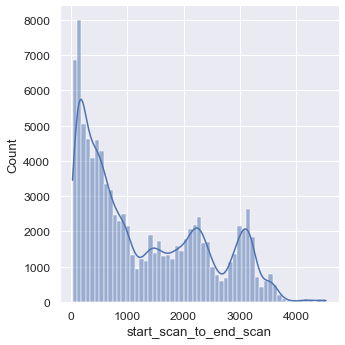

In [23]:
sns.displot(df_full_truck_load['start_scan_to_end_scan'], kde=True)

- **Observation** :
 - Multi-modal distribution . Need to explore if "start_scan_to_end_scan i.e. Time taken to deliver from source to destination) can be categorized as sub categories such small time ,medium and large time (in consultation with domain experts)  

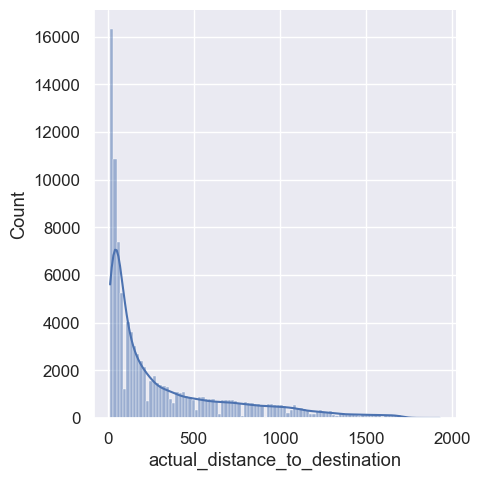

In [24]:
sns.displot(df_full_truck_load['actual_distance_to_destination'], kde=True)

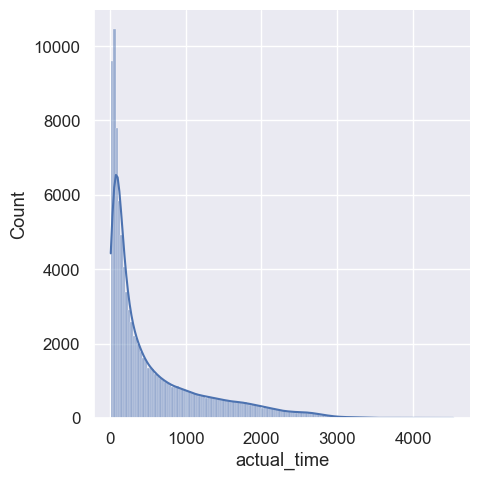

In [25]:
sns.displot(df_full_truck_load['actual_time'], kde=True)

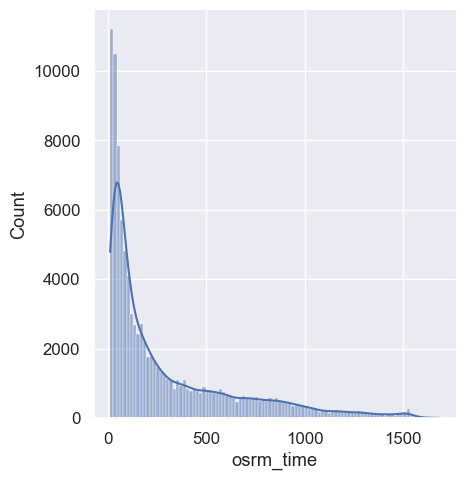

In [26]:
sns.displot(df_full_truck_load['osrm_time'], kde=True)

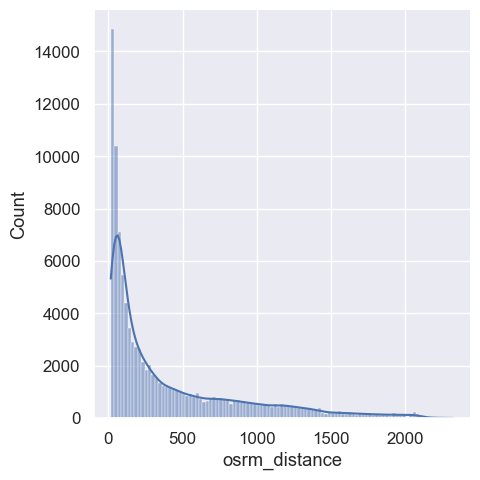

In [27]:
sns.displot(df_full_truck_load['osrm_distance'], kde=True)

#### Distribution plot of route type - Carting

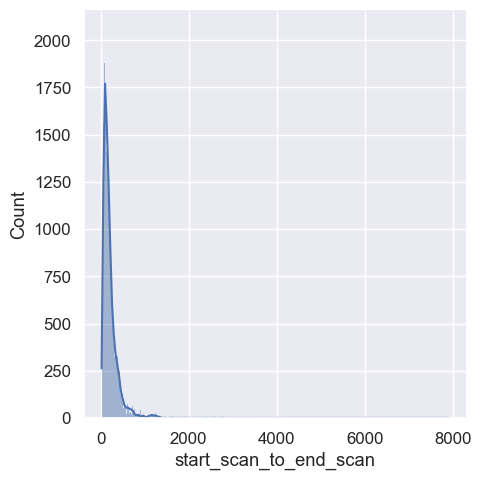

In [28]:
sns.displot(df_carting['start_scan_to_end_scan'], kde=True)

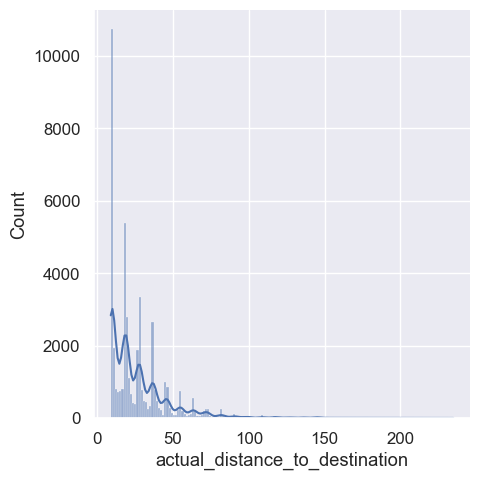

In [29]:
sns.displot(df_carting['actual_distance_to_destination'], kde=True)

-**Observations**
  - Multiple sub category of distances can be created by consulting with domain experts

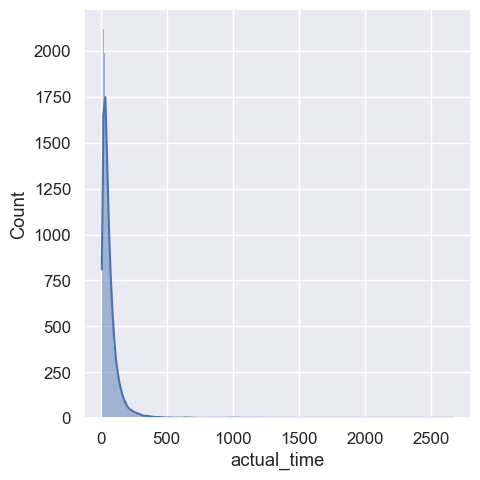

In [30]:
sns.displot(df_carting['actual_time'], kde=True)

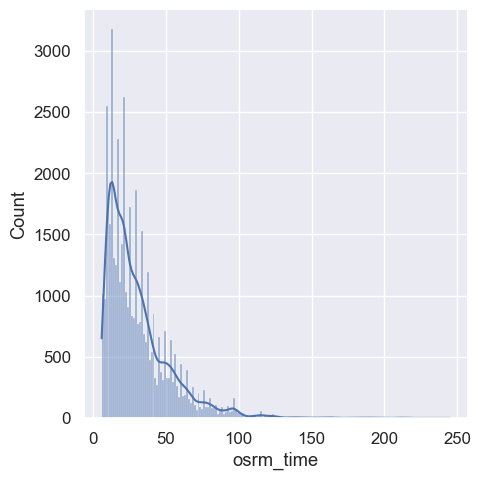

In [31]:
sns.displot(df_carting['osrm_time'], kde=True)

#### Boxplot route type vs actual_time

<AxesSubplot:xlabel='route_type', ylabel='actual_time'>

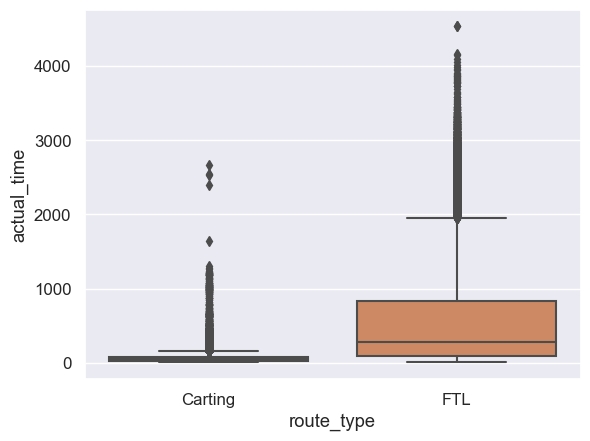

In [32]:
sns.boxplot(x="route_type", y="actual_time", data=df)

#### Boxplot route type vs actual_distance_to_destination

<AxesSubplot:xlabel='route_type', ylabel='actual_distance_to_destination'>

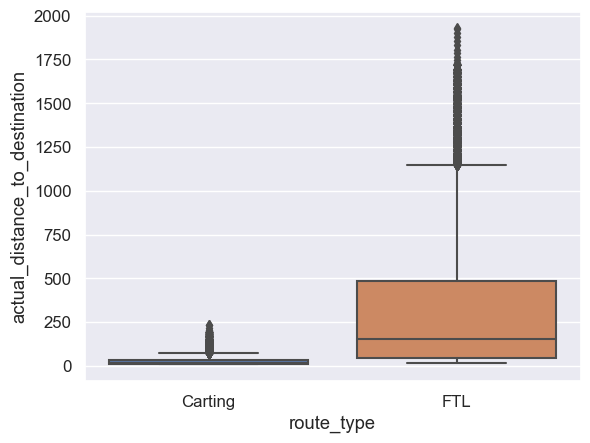

In [33]:
sns.boxplot(x="route_type", y="actual_distance_to_destination", data=df)

#### Boxplot route type vs start_scan_to_end_scan

<AxesSubplot:xlabel='route_type', ylabel='start_scan_to_end_scan'>

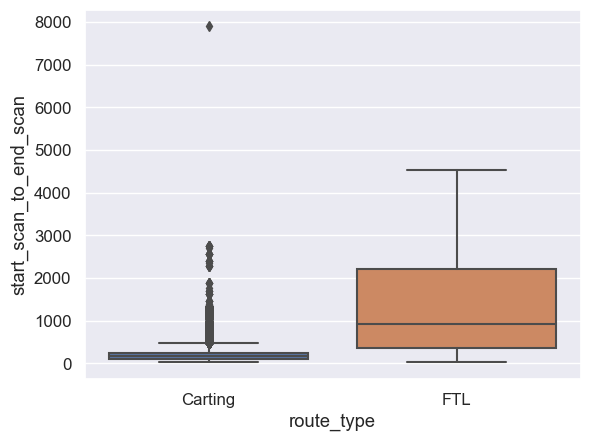

In [34]:
sns.boxplot(x="route_type", y="start_scan_to_end_scan", data=df)

- **Insights**
 - Insights based on EDA
    - **Outliers** - Most of the continious features have outliers 
    - **Distribution** - **None of the features follow Normal distribution** even for both route category i.e Full truck load and Carting
      - **start_scan_to_end_scan** follow **multi-modal distribution** , very likely it contains multiple sub-category in the distribution 
      - **Other continious variables follow Exponential distribution** 

### Feature Engineering (Part 1)

- **Trip_creation_time**: Extracting features like month, year and day from trip booking date

In [35]:
df["trip_creation_time_year"] = df["trip_creation_time"].dt.year
df["trip_creation_time_month"] = df["trip_creation_time"].dt.month_name()
df["trip_creation_time_weekday"] = df["trip_creation_time"].dt.weekday
df["trip_creation_time_day"] = df["trip_creation_time"].dt.day

In [36]:
df["od_start_time_year"] = df["od_start_time"].dt.year
df["od_start_time_month"] = df["od_start_time"].dt.month_name()
df["od_start_time_weekday"] = df["od_start_time"].dt.weekday
df["od_start_time_day"] = df["od_start_time"].dt.day

In [37]:
df["od_end_time_year"] = df["od_end_time"].dt.year
df["od_end_time_month"] = df["od_end_time"].dt.month_name()
df["od_end_time_weekday"] = df["od_end_time"].dt.weekday
df["od_end_time_day"] = df["od_end_time"].dt.day

- Feature extraction from **"Source Name"** to **City, Place, Code and State**

In [38]:
df[['source_name_city','source_name_place','source_name_code','source_name_state']] = df.source_name.str.extract('([a-zA-Z]+)\_([a-zA-Z]+)\_([a-zA-Z]+)\s+\(([a-zA-Z]+)\)', expand=False)

In [39]:
df[['source_name','source_name_city','source_name_place','source_name_code','source_name_state']]

,source_name,source_name_city,source_name_place,source_name_code,source_name_state
0,Anand_VUNagar_DC (Gujarat),Anand,VUNagar,DC,Gujarat
1,Anand_VUNagar_DC (Gujarat),Anand,VUNagar,DC,Gujarat
2,Anand_VUNagar_DC (Gujarat),Anand,VUNagar,DC,Gujarat
3,Anand_VUNagar_DC (Gujarat),Anand,VUNagar,DC,Gujarat
4,Anand_VUNagar_DC (Gujarat),Anand,VUNagar,DC,Gujarat
...,...,...,...,...,...
144862,Sonipat_Kundli_H (Haryana),Sonipat,Kundli,H,Haryana
144863,Sonipat_Kundli_H (Haryana),Sonipat,Kundli,H,Haryana
144864,Sonipat_Kundli_H (Haryana),Sonipat,Kundli,H,Haryana
144865,Sonipat_Kundli_H (Haryana),Sonipat,Kundli,H,Haryana


#### Data cleanup | source_name_city  | Level Bangalore , Bengaluru to Bengaluru 

In [40]:
# Re-leveling source city from Bangalore to Bengaluru as both signifies same city
df["source_name_city"]= df["source_name_city"].str.replace("Bangalore", "Bengaluru", case = True)
df["source_name_city"].replace(to_replace=r'(^Del$)', value='Delhi', regex=True,inplace = True)

- Feature extraction from **"Destination Name"** to **City, Place, Code and State**

In [41]:
df[['destination_name_city','destination_name_place','destination_name_code','destination_name_state']] = df.destination_name.str.extract('([a-zA-Z]+)\_([a-zA-Z]+)\_([a-zA-Z]+)\s+\(([a-zA-Z]+)\)', expand=False)

In [42]:
df[['destination_name_city','destination_name_place','destination_name_code','destination_name_state']]

,destination_name_city,destination_name_place,destination_name_code,destination_name_state
0,Khambhat,MotvdDPP,D,Gujarat
1,Khambhat,MotvdDPP,D,Gujarat
2,Khambhat,MotvdDPP,D,Gujarat
3,Khambhat,MotvdDPP,D,Gujarat
4,Khambhat,MotvdDPP,D,Gujarat
...,...,...,...,...
144862,Gurgaon,Bilaspur,HB,Haryana
144863,Gurgaon,Bilaspur,HB,Haryana
144864,Gurgaon,Bilaspur,HB,Haryana
144865,Gurgaon,Bilaspur,HB,Haryana


#### Data cleanup | destination_name_city |  Level Bangalore , Bengaluru to Bengaluru 

In [43]:
# Re-leveling destination city from Bangalore to Bengaluru as both signifies same city
df["destination_name_city"]= df["destination_name_city"].str.replace("Bangalore", "Bengaluru", case = True)

### Non-Graphical Analysis (Part 2)

In [44]:
df_full_truck_load = df[df["route_type"] == 'FTL']
df_carting = df[df["route_type"] == 'Carting']

In [45]:
# Viewing top proportion of orders based on source and destination states
source_destination_state_ct= pd.crosstab(df_full_truck_load["source_name_state"],df_full_truck_load["destination_name_state"], margins=True,normalize=True).round(4)*100
source_destination_state_ct.sort_values('All', ascending=False).iloc[:5]

destination_name_state,Assam,Bihar,Chandigarh,Chhattisgarh,Delhi,Gujarat,Haryana,Jharkhand,Karnataka,Kerala,Maharashtra,Mizoram,Orissa,Punjab,Rajasthan,Telangana,Tripura,Uttarakhand,All
source_name_state,,,,,,,,,,,,,,,,,,,
All,0.59,4.05,0.1,0.25,2.79,1.88,21.45,0.89,23.26,1.15,21.79,0.08,0.29,4.73,2.97,12.36,0.02,1.35,100.00
Haryana,0.00,1.78,0.0,0.00,0.19,0.95,1.24,0.00,12.27,0.00,6.75,0.00,0.00,2.21,0.69,4.04,0.00,0.24,30.36
Maharashtra,0.00,0.00,0.0,0.00,2.38,0.00,7.23,0.00,3.91,0.00,9.01,0.00,0.00,0.15,0.00,2.30,0.00,0.00,24.98
Karnataka,0.00,0.00,0.0,0.00,0.00,0.00,8.37,0.00,4.89,0.66,2.55,0.00,0.00,0.00,0.00,0.54,0.00,0.00,17.01
Telangana,0.00,0.00,0.0,0.00,0.00,0.00,0.14,0.00,0.70,0.00,1.18,0.00,0.00,0.00,0.00,5.48,0.00,0.00,7.50


In [46]:
# Viewing top proportion of orders based on source and destination cities
source_destination_city_ct= pd.crosstab(df_full_truck_load["source_name_city"],df_full_truck_load["destination_name_city"], margins=True,normalize=True).round(4)*100
source_destination_city_ct.sort_values('All', ascending=False).iloc[:5]

destination_name_city,Achrol,Agartala,Aizawl,Ajmer,Akola,Almora,Aluva,Ambajogai,Amreli,AnandprShb,...,Vadakkencherry,Vadnagar,Vadodara,Vaikom,Wanaparthy,Warangal,Yellandu,Yellareddy,Zahirabad,All
source_name_city,,,,,,,,,,,,,,,,,,,,,
All,0.03,0.01,0.02,0.01,1.06,0.05,0.67,0.03,0.15,0.09,...,0.07,0.06,0.98,0.0,0.04,0.41,0.06,0.1,0.11,100.00
Gurgaon,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.95,0.0,0.00,0.00,0.00,0.0,0.00,28.42
Bhiwandi,0.00,0.00,0.00,0.00,1.03,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,14.26
Bengaluru,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,12.91
Pune,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,6.24


In [47]:
# Viewing top proportion of orders based on source and destination place
source_destination_place_ct= pd.crosstab(df_full_truck_load["source_name_place"],df_full_truck_load["destination_name_place"], margins=True,normalize=True,dropna=True).round(4)*100
source_destination_place_ct.sort_values(by = ['All', 'source_name_place'], ascending = [False, False]).iloc[:5]

destination_name_place,Adargchi,AdrshSt,AgrohDPP,Airport,AkkolRD,Alngjuri,AmbedDPP,AnugrDPP,Aravind,AskNagar,...,Vidygiri,Vijayght,VikrmMah,Xroad,YTRd,Yadvgiri,Yellanda,kalibari,patna,All
source_name_place,,,,,,,,,,,,,,,,,,,,,
All,0.72,0.0,0.05,2.79,0.05,0.06,0.01,0.02,0.02,0.11,...,0.15,0.01,0.07,0.13,0.09,0.23,0.09,0.04,0.07,100.00
Bilaspur,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,28.42
Mankoli,0.00,0.0,0.00,2.38,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,14.26
Nelmngla,0.11,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.13,0.00,0.00,0.00,12.20
Tathawde,0.23,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.24


### Visual Analysis (Part 2) - Post Initial Feature engineering

In [515]:
# selecting specific categorical features 
selected_categorical_features = ['source_name_state','destination_name_state','trip_creation_time_weekday', 'trip_creation_time_day','od_start_time_weekday', 
       'od_start_time_day','od_end_time_weekday', 'od_end_time_day']

In [516]:
# selecting specific numeric/continious features 
selected_continious_features = ['start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance']

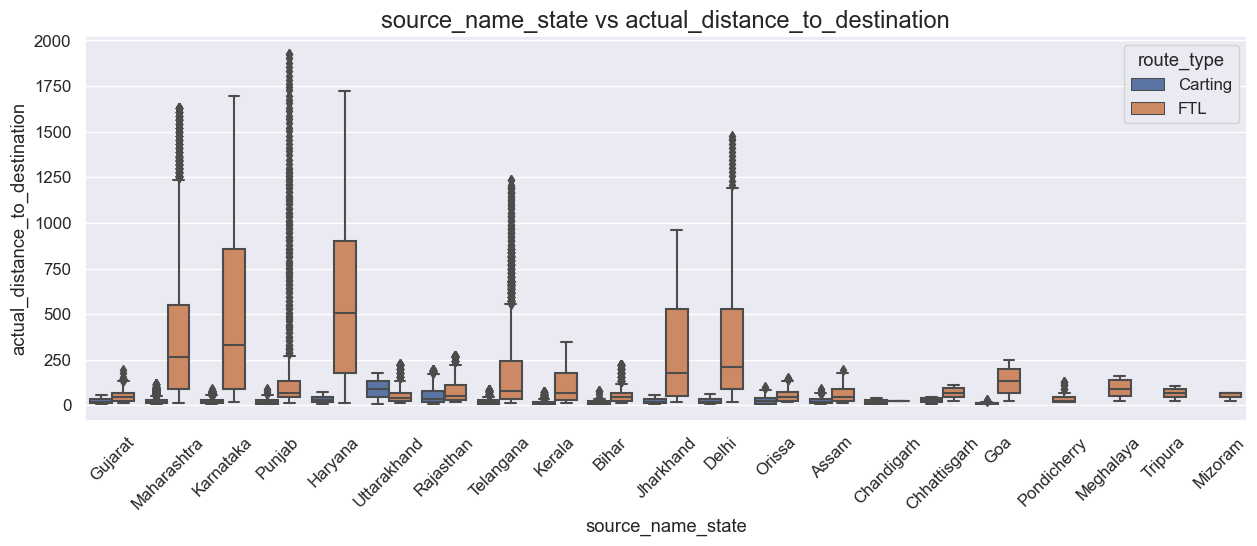

In [201]:
# plotting box plots and adding title , rotation for better visibility of levels i.e states 
fig, axes = plt.subplots(figsize=(15,5))
plt.title("source_name_state vs actual_distance_to_destination",fontdict ={"fontsize": 17})
plt.xticks(rotation = 45)
sns.boxplot(x="source_name_state", y="actual_distance_to_destination", hue="route_type", data=df)
plt.show()

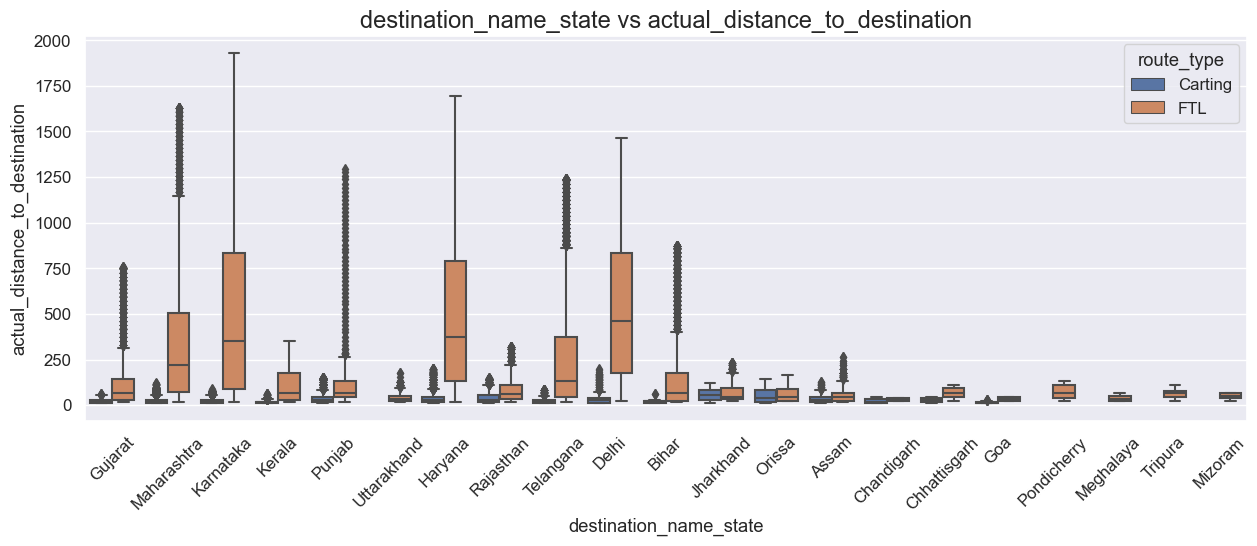

In [202]:
fig, axes = plt.subplots(figsize=(15,5))
plt.title("destination_name_state vs actual_distance_to_destination",fontdict ={"fontsize": 17})
plt.xticks(rotation = 45)
sns.boxplot(x="destination_name_state", y="actual_distance_to_destination", hue="route_type", data=df)
plt.show()

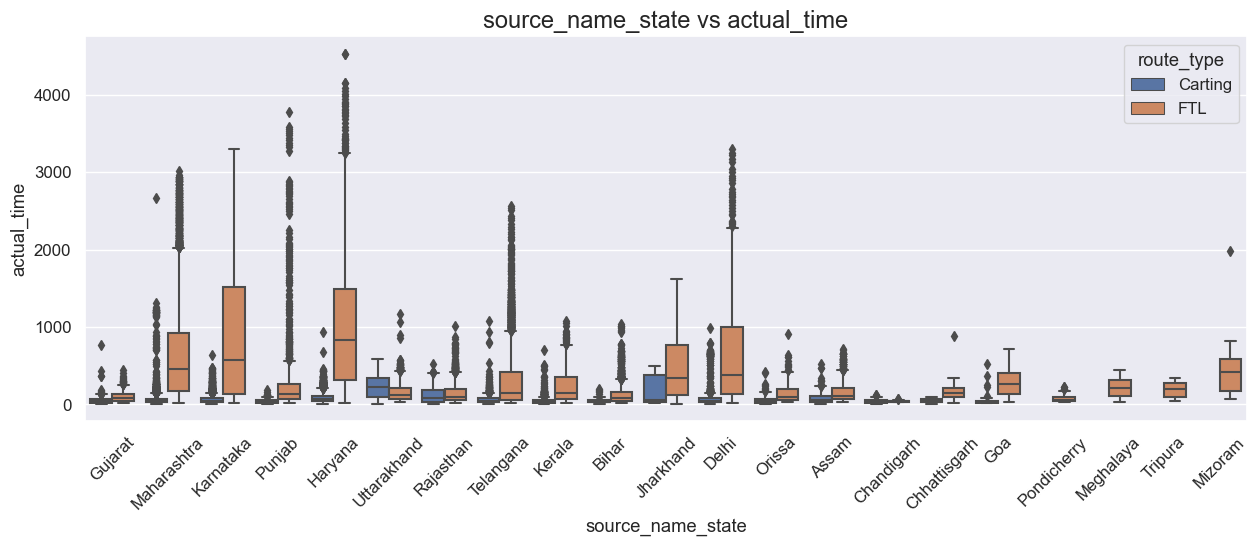

In [203]:
fig, axes = plt.subplots(figsize=(15,5))
plt.title("source_name_state vs actual_time",fontdict ={"fontsize": 17})
plt.xticks(rotation = 45)
sns.boxplot(x="source_name_state", y="actual_time", hue="route_type", data=df)
plt.show()

- **Observation** :
 - Relatively **more Carting trips originated from "Uttarakhand" , "Rajasthan" , "Jharkhand"** etc.

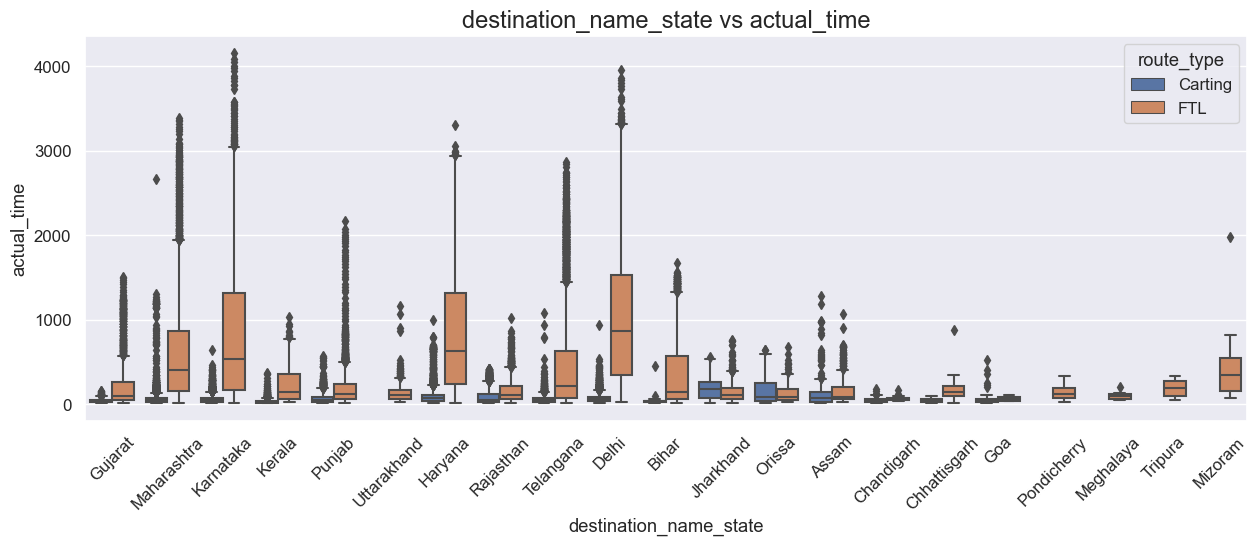

In [204]:
fig, axes = plt.subplots(figsize=(15,5))
plt.title("destination_name_state vs actual_time",fontdict ={"fontsize": 17})
plt.xticks(rotation = 45)
sns.boxplot(x="destination_name_state", y="actual_time", hue="route_type", data=df)
plt.show()

- **Observation** :
 - Relatively more **Carting trips** booked **for destination "Jharkhand" , "Orissa" and Assam**

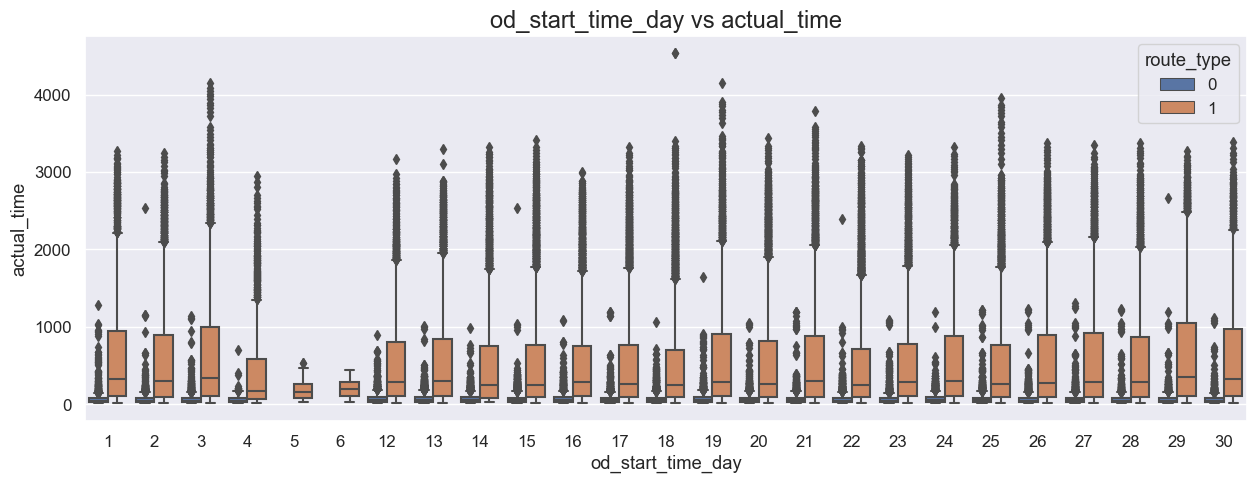

In [293]:
fig, axes = plt.subplots(figsize=(15,5))
plt.title("od_start_time_day vs actual_time",fontdict ={"fontsize": 17})
sns.boxplot(x="od_start_time_day", y="actual_time", hue="route_type", data=df)
plt.show()

- **Observation** :
 - Relatively less full truck loads trips starting on 5th or 6th day of the month  

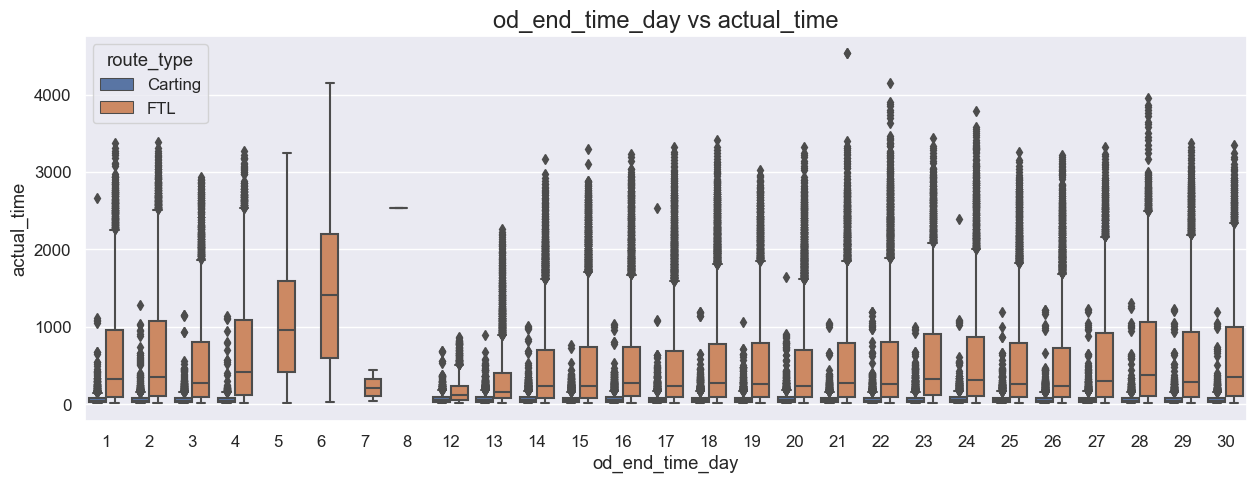

In [206]:
fig, axes = plt.subplots(figsize=(15,5))
plt.title("od_end_time_day vs actual_time",fontdict ={"fontsize": 17})
sns.boxplot(x="od_end_time_day", y="actual_time", hue="route_type", data=df)
plt.show()

- **Observation** :
 - Relatively **large full truck loads** trips **ending on 5th or 6th day of the month**
 - Relatively **less full truck loads** trips **ending on 7th or 8th day of the month**

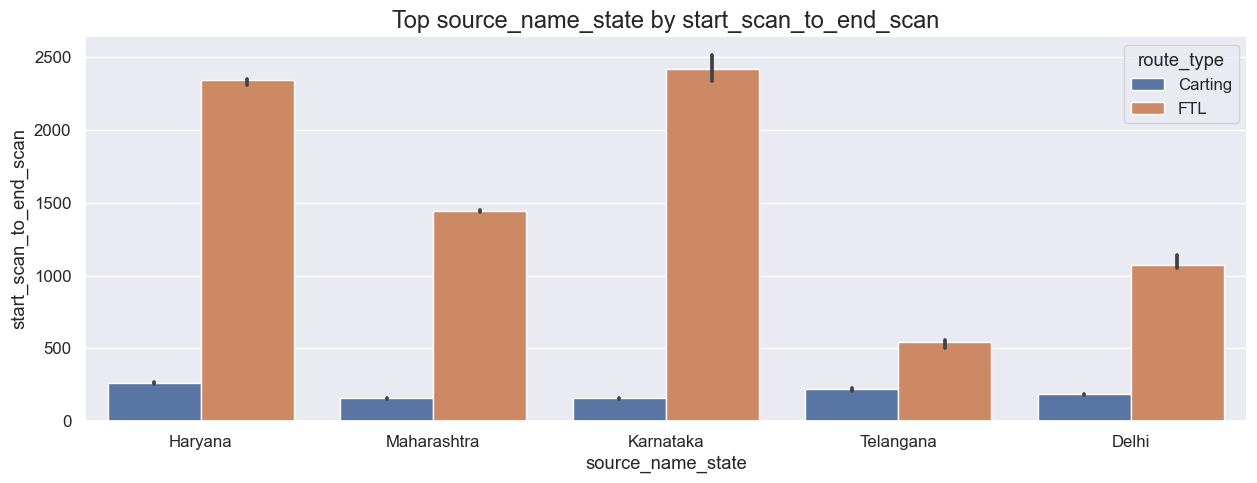

In [207]:
# Showing top 5 source_names which registers max time of delivery 
fig, axes = plt.subplots(figsize=(15,5))
plt.title("Top source_name_state by start_scan_to_end_scan",fontdict ={"fontsize": 17})
sns.barplot(x="source_name_state", y="start_scan_to_end_scan", hue="route_type", data=df, order=df["source_name_state"].value_counts().iloc[:5].index,estimator=np.median)
plt.show()

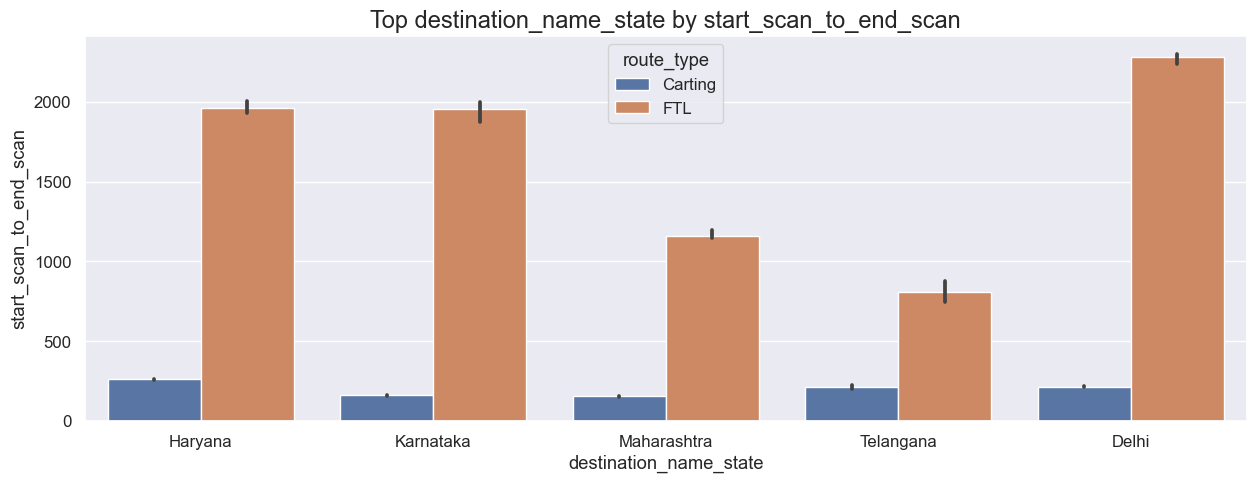

In [208]:
# Showing top 5 destination_name_states which registers max time of delivery 
fig, axes = plt.subplots(figsize=(15,5))
plt.title("Top destination_name_state by start_scan_to_end_scan",fontdict ={"fontsize": 17})
# estimator used as median as there are many outliers in the data
sns.barplot(x="destination_name_state", y="start_scan_to_end_scan", hue="route_type", data=df, order=df["destination_name_state"].value_counts().iloc[:5].index,estimator=np.median)
plt.show()

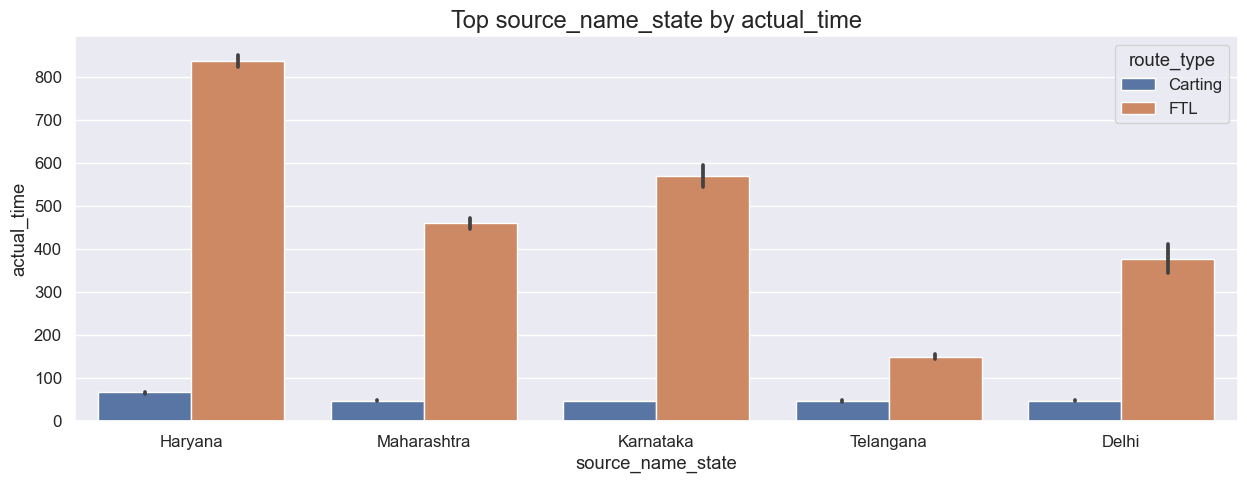

In [209]:
# Showing top 5 source_name_states which registers max actual time of delivery 
fig, axes = plt.subplots(figsize=(15,5))
plt.title("Top source_name_state by actual_time",fontdict ={"fontsize": 17})
sns.barplot(x="source_name_state", y="actual_time", hue="route_type", data=df, order=df["source_name_state"].value_counts().iloc[:5].index,estimator=np.median)
plt.show()

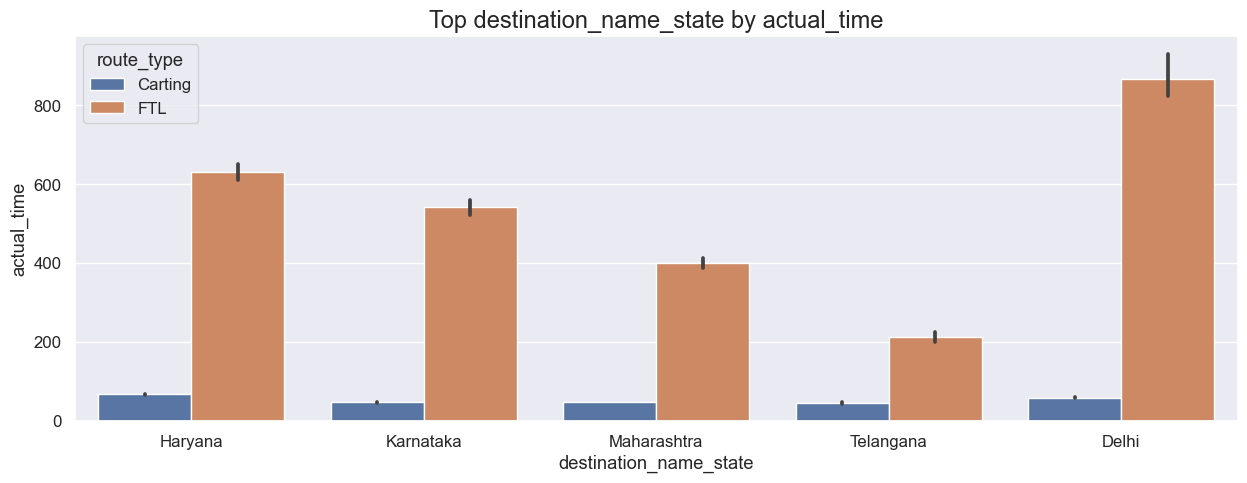

In [210]:
# Showing top 5 destination_name_states which registers max actual time of delivery 
fig, axes = plt.subplots(figsize=(15,5))
plt.title("Top destination_name_state by actual_time",fontdict ={"fontsize": 17})
sns.barplot(x="destination_name_state", y="actual_time", hue="route_type", data=df, order=df["destination_name_state"].value_counts().iloc[:5].index,estimator=np.median)
plt.show()

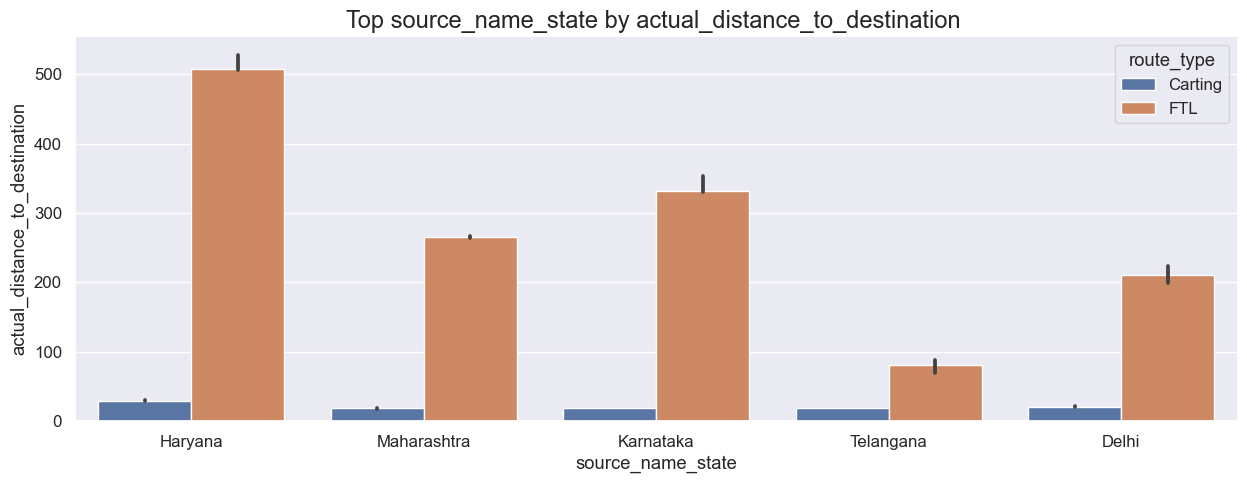

In [211]:
# Showing top 5 source_name_states which registers max actual distance of delivery 
fig, axes = plt.subplots(figsize=(15,5))
plt.title("Top source_name_state by actual_distance_to_destination ",fontdict ={"fontsize": 17})
sns.barplot(x="source_name_state", y="actual_distance_to_destination", hue="route_type", data=df, order=df["source_name_state"].value_counts().iloc[:5].index,estimator=np.median)
plt.show()

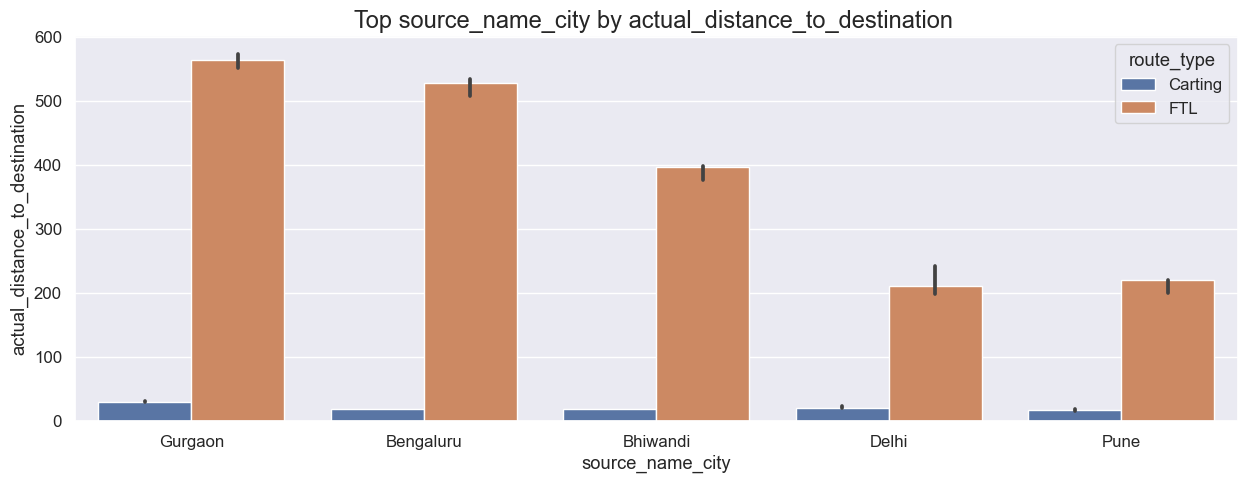

In [212]:
# Showing top 5 source_name_cities which registers max actual distance of delivery 
fig, axes = plt.subplots(figsize=(15,5))
plt.title("Top source_name_city by actual_distance_to_destination ",fontdict ={"fontsize": 17})
sns.barplot(x="source_name_city", y="actual_distance_to_destination", hue="route_type", data=df, order=df["source_name_city"].value_counts().iloc[:5].index,estimator=np.median)
plt.show()

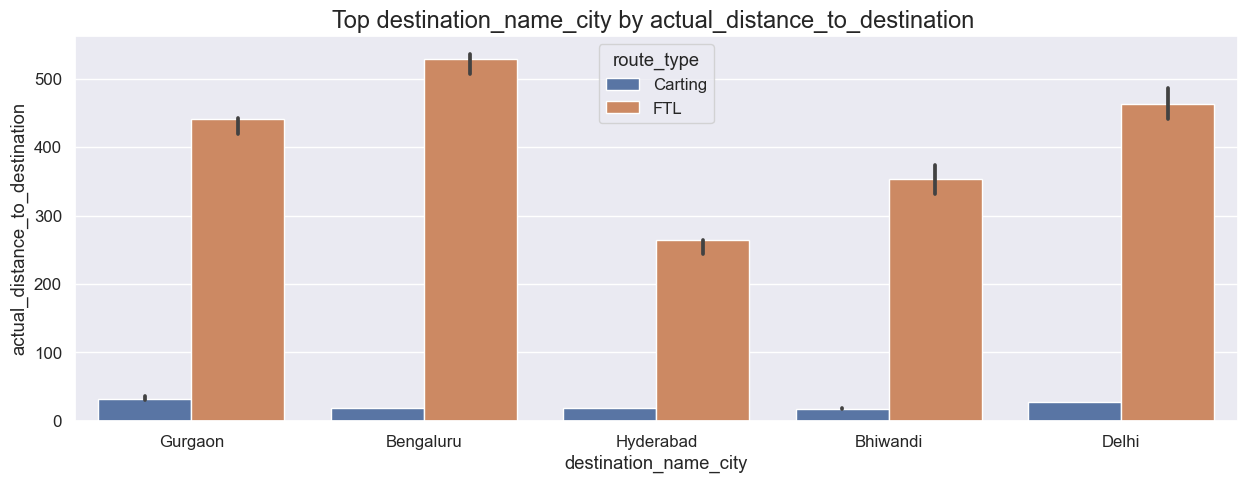

In [213]:
# Showing top 5 destination_name_cities which registers max actual distance of delivery 
fig, axes = plt.subplots(figsize=(15,5))
plt.title("Top destination_name_city by actual_distance_to_destination ",fontdict ={"fontsize": 17})
sns.barplot(x="destination_name_city", y="actual_distance_to_destination", hue="route_type", data=df, order=df["destination_name_city"].value_counts().iloc[:5].index,estimator=np.median)
plt.show()

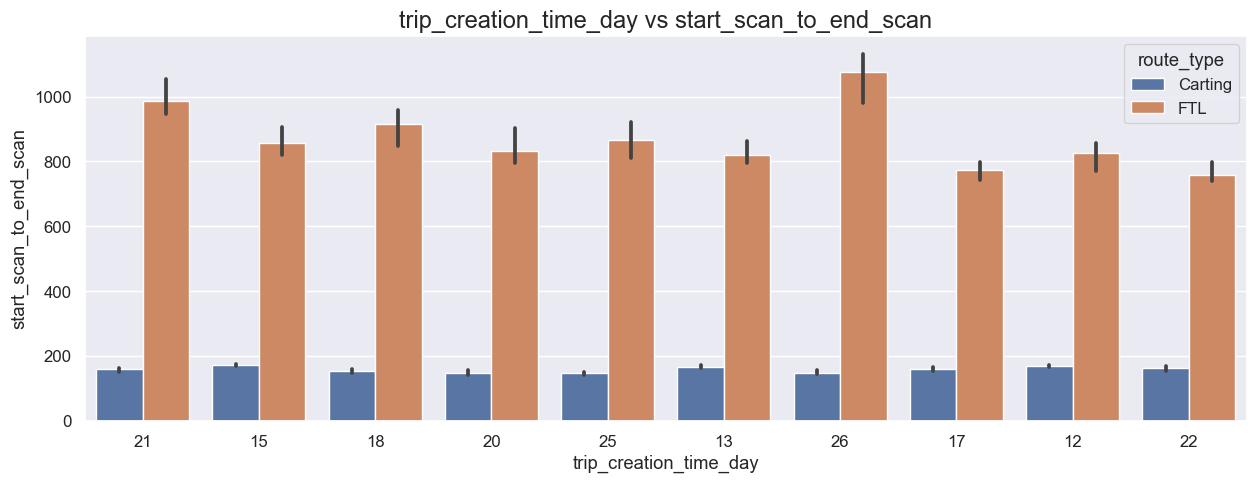

In [214]:
# Showing top 10 trip creation days which registers max time of delivery 
fig, axes = plt.subplots(figsize=(15,5))
plt.title("trip_creation_time_day vs start_scan_to_end_scan",fontdict ={"fontsize": 17})
sns.barplot(x="trip_creation_time_day", y="start_scan_to_end_scan", hue="route_type", data=df, order=df["trip_creation_time_day"].value_counts().iloc[:10].index,estimator=np.median)
plt.show()

**Observations**
- **Most Time taken**(i.e. for route type full truck load) to **deliver from source to destination** are from  **Haryana , Karnataka , Maharshtra , Delhi , Telangana**
- **Actual time taken to complete the delivery** are high for source/destination **Haryana , Karnataka , Maharshtra , Delhi , Telangana** 
- **Most distanced cities** for full truck deliveries are **Gurgaon , Bengaluru , Bhiwandi**
- **Most trips are being booked on 12,13,15,17,18,20,21,22,25,26**  days of the month

### Aggregation of fields and Merging of rows


#### Aggregation and Merge by trip_uuid

In [48]:
# Aggregation by trip_uuid
df_agg = df.groupby("trip_uuid")[["actual_time", "actual_distance_to_destination","osrm_time","segment_osrm_time","segment_actual_time", "osrm_distance", "segment_osrm_distance"]].aggregate({"actual_time":"sum", "osrm_time": "sum","segment_osrm_time": "sum","segment_actual_time": "sum", "osrm_distance": "sum", "segment_osrm_distance": "sum"})
df_agg.reset_index(inplace=True)
df_agg.rename(columns = {'actual_time':'actual_time_aggregated','actual_distance_to_destination':'actual_distance_to_destination_aggregated','osrm_time':'osrm_time_aggregated','segment_osrm_time':'segment_osrm_time_aggregated','segment_actual_time':'segment_actual_time_aggregated', 'osrm_distance':'osrm_distance_aggregated', 'segment_osrm_distance':'segment_osrm_distance_aggregated'}, inplace = True)
df_agg.head()

,trip_uuid,actual_time_aggregated,osrm_time_aggregated,segment_osrm_time_aggregated,segment_actual_time_aggregated,osrm_distance_aggregated,segment_osrm_distance_aggregated
0,trip-153671041653548748,15682.0,7787.0,1008.0,1548.0,10577.7647,1320.4733
1,trip-153671042288605164,399.0,210.0,65.0,141.0,269.4308,84.1894
2,trip-153671043369099517,112225.0,65768.0,1941.0,3308.0,89447.2488,2545.2678
3,trip-153671046011330457,82.0,24.0,16.0,59.0,31.6475,19.8766
4,trip-153671052974046625,556.0,207.0,115.0,340.0,266.2914,146.7919


In [49]:
# Selecting specific features from non aggregated data , before merging
df_org = df[["trip_uuid","route_type","trip_creation_time_year","trip_creation_time_month","trip_creation_time_weekday","trip_creation_time_day"]]
df_org.shape

(144867, 6)

In [50]:
# Removing duplicate datas , keep first occurance of the data
df_org = df_org.drop_duplicates(keep='first')
df_org.shape

(14817, 6)

In [51]:
# viewing selected rows post removing duplicate rows
df_org.head()

,trip_uuid,route_type,trip_creation_time_year,trip_creation_time_month,trip_creation_time_weekday,trip_creation_time_day
0,trip-153741093647649320,Carting,2018,September,3,20
10,trip-153768492602129387,FTL,2018,September,6,23
15,trip-153693976643699843,Carting,2018,September,4,14
17,trip-153687145942424248,FTL,2018,September,3,13
35,trip-153825970514894360,FTL,2018,September,5,29


In [52]:
# Removing duplicate records post aggregation 
df_agg = df_agg.drop_duplicates(keep='first')
df_agg.shape

(14817, 7)

In [53]:
# Merging aggregated and raw features
df_agg = pd.merge(df_agg, df_org, how="inner", on="trip_uuid")
df_agg.shape

(14817, 12)

In [54]:
df_agg.head()

,trip_uuid,actual_time_aggregated,osrm_time_aggregated,segment_osrm_time_aggregated,segment_actual_time_aggregated,osrm_distance_aggregated,segment_osrm_distance_aggregated,route_type,trip_creation_time_year,trip_creation_time_month,trip_creation_time_weekday,trip_creation_time_day
0,trip-153671041653548748,15682.0,7787.0,1008.0,1548.0,10577.7647,1320.4733,FTL,2018,September,2,12
1,trip-153671042288605164,399.0,210.0,65.0,141.0,269.4308,84.1894,Carting,2018,September,2,12
2,trip-153671043369099517,112225.0,65768.0,1941.0,3308.0,89447.2488,2545.2678,FTL,2018,September,2,12
3,trip-153671046011330457,82.0,24.0,16.0,59.0,31.6475,19.8766,Carting,2018,September,2,12
4,trip-153671052974046625,556.0,207.0,115.0,340.0,266.2914,146.7919,FTL,2018,September,2,12


#### Aggregation and Merge by 'trip_uuid','source_name', 'destination_name' - Select first and last

- **Aggregation by 'trip_uuid','source_center', 'destination_center'**

In [57]:
# Aggregation by trip_uuid , source_center, destination_center
#df_agg_by_trip_src_dest= df.groupby(['trip_uuid','source_center', 'destination_center'])[["actual_time", "actual_distance_to_destination","osrm_time","segment_osrm_time","segment_actual_time", "osrm_distance", "segment_osrm_distance"]].aggregate({"actual_time":['first','last'], "osrm_time": ['first','last'],"segment_osrm_time": ['first','last'],"segment_actual_time": ['first','last'], "osrm_distance": ['first','last'], "segment_osrm_distance": ['first','last']})
df_agg_by_trip_src_dest_center= df.groupby(['trip_uuid','source_center', 'destination_center'])[["actual_time", "actual_distance_to_destination","osrm_time","segment_osrm_time","segment_actual_time", "osrm_distance", "segment_osrm_distance"]].aggregate({"actual_time":['first','last'], "osrm_time": ['first','last'],"segment_osrm_time": ['first','last'],"segment_actual_time": ['first','last'], "osrm_distance": ['first','last'], "segment_osrm_distance": ['first','last']})

# Unfolding grouped data to rows
df_agg_by_trip_src_dest_center.reset_index(inplace=True)
# Renaming grouped columns 
df_agg_by_trip_src_dest_center.columns = ['_'.join(col) for col in df_agg_by_trip_src_dest_center.columns]
# Removing underscore from column names source_center_ and  destination_center_
df_agg_by_trip_src_dest_center.rename(columns = {'trip_uuid_':'trip_uuid','source_center_':'source_center','destination_center_':'destination_center'}, inplace = True)
# Merge by trip_uuid 
df_agg_by_trip_src_dest_center_merged = pd.merge(df_agg_by_trip_src_dest_center, df_org, how="inner", on="trip_uuid")
df_agg_by_trip_src_dest_center_merged.head()

,trip_uuid,source_center,destination_center,actual_time_first,actual_time_last,osrm_time_first,osrm_time_last,segment_osrm_time_first,segment_osrm_time_last,segment_actual_time_first,segment_actual_time_last,osrm_distance_first,osrm_distance_last,segment_osrm_distance_first,segment_osrm_distance_last,route_type,trip_creation_time_year,trip_creation_time_month,trip_creation_time_weekday,trip_creation_time_day
0,trip-153671041653548748,IND209304AAA,IND000000ACB,50.0,732.0,33.0,329.0,33.0,10.0,50.0,20.0,38.0620,446.5496,38.0620,15.0693,FTL,2018,September,2,12
1,trip-153671041653548748,IND462022AAA,IND209304AAA,43.0,830.0,39.0,388.0,39.0,3.0,43.0,22.0,55.2597,544.8027,55.2597,5.3898,FTL,2018,September,2,12
2,trip-153671042288605164,IND561203AAB,IND562101AAA,18.0,47.0,10.0,26.0,10.0,7.0,18.0,15.0,10.8633,28.1994,10.8633,6.9464,Carting,2018,September,2,12
3,trip-153671042288605164,IND572101AAA,IND561203AAB,14.0,96.0,8.0,42.0,8.0,3.0,14.0,20.0,10.3544,56.9116,10.3544,3.8074,Carting,2018,September,2,12
4,trip-153671043369099517,IND000000ACB,IND160002AAC,36.0,611.0,19.0,212.0,19.0,28.0,36.0,275.0,27.2834,281.2109,27.2834,32.8506,FTL,2018,September,2,12


- **Aggregation by 'trip_uuid','source_name', 'destination_name'**

In [524]:
# Aggregation by trip_uuid , source_name, destination_name
df_agg_by_trip_src_dest= df.groupby(['trip_uuid','source_name', 'destination_name'])[["actual_time", "actual_distance_to_destination","osrm_time","segment_osrm_time","segment_actual_time", "osrm_distance", "segment_osrm_distance"]].aggregate({"actual_time":['first','last'], "osrm_time": ['first','last'],"segment_osrm_time": ['first','last'],"segment_actual_time": ['first','last'], "osrm_distance": ['first','last'], "segment_osrm_distance": ['first','last']})

# Unfolding grouped data to rows
df_agg_by_trip_src_dest.reset_index(inplace=True)
# Renaming grouped columns 
df_agg_by_trip_src_dest.columns = ['_'.join(col) for col in df_agg_by_trip_src_dest.columns]
# Removing underscore from column names source_center_ and  destination_center_
df_agg_by_trip_src_dest.rename(columns = {'trip_uuid_':'trip_uuid','source_name_':'source_name','destination_name_':'destination_name'}, inplace = True)
df_agg_by_trip_src_dest.head()

,trip_uuid,source_name,destination_name,actual_time_first,actual_time_last,osrm_time_first,osrm_time_last,segment_osrm_time_first,segment_osrm_time_last,segment_actual_time_first,segment_actual_time_last,osrm_distance_first,osrm_distance_last,segment_osrm_distance_first,segment_osrm_distance_last
0,trip-153671041653548748,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),43.0,830.0,39.0,388.0,39.0,3.0,43.0,22.0,55.2597,544.8027,55.2597,5.3898
1,trip-153671041653548748,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),50.0,732.0,33.0,329.0,33.0,10.0,50.0,20.0,38.0620,446.5496,38.0620,15.0693
2,trip-153671042288605164,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),18.0,47.0,10.0,26.0,10.0,7.0,18.0,15.0,10.8633,28.1994,10.8633,6.9464
3,trip-153671042288605164,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),14.0,96.0,8.0,42.0,8.0,3.0,14.0,20.0,10.3544,56.9116,10.3544,3.8074
4,trip-153671043369099517,Bangalore_Nelmngla_H (Karnataka),Gurgaon_Bilaspur_HB (Haryana),60.0,2736.0,27.0,1528.0,27.0,52.0,60.0,84.0,30.0119,2072.8556,30.0119,44.8125


In [525]:
df_agg_by_trip_src_dest.shape

(26368, 15)

- **Merge by 'trip_uuid'**

In [526]:
df_agg_by_trip_src_dest_merged = pd.merge(df_agg_by_trip_src_dest, df_org, how="inner", on="trip_uuid")
df_agg_by_trip_src_dest_merged.shape

(26368, 20)

In [527]:
df_agg_by_trip_src_dest_merged.head()

,trip_uuid,source_name,destination_name,actual_time_first,actual_time_last,osrm_time_first,osrm_time_last,segment_osrm_time_first,segment_osrm_time_last,segment_actual_time_first,segment_actual_time_last,osrm_distance_first,osrm_distance_last,segment_osrm_distance_first,segment_osrm_distance_last,route_type,trip_creation_time_year,trip_creation_time_month,trip_creation_time_weekday,trip_creation_time_day
0,trip-153671041653548748,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),43.0,830.0,39.0,388.0,39.0,3.0,43.0,22.0,55.2597,544.8027,55.2597,5.3898,FTL,2018,September,2,12
1,trip-153671041653548748,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),50.0,732.0,33.0,329.0,33.0,10.0,50.0,20.0,38.0620,446.5496,38.0620,15.0693,FTL,2018,September,2,12
2,trip-153671042288605164,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),18.0,47.0,10.0,26.0,10.0,7.0,18.0,15.0,10.8633,28.1994,10.8633,6.9464,Carting,2018,September,2,12
3,trip-153671042288605164,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),14.0,96.0,8.0,42.0,8.0,3.0,14.0,20.0,10.3544,56.9116,10.3544,3.8074,Carting,2018,September,2,12
4,trip-153671043369099517,Bangalore_Nelmngla_H (Karnataka),Gurgaon_Bilaspur_HB (Haryana),60.0,2736.0,27.0,1528.0,27.0,52.0,60.0,84.0,30.0119,2072.8556,30.0119,44.8125,FTL,2018,September,2,12


In [528]:
df_agg_by_trip_src_dest_merged.head()

,trip_uuid,source_name,destination_name,actual_time_first,actual_time_last,osrm_time_first,osrm_time_last,segment_osrm_time_first,segment_osrm_time_last,segment_actual_time_first,segment_actual_time_last,osrm_distance_first,osrm_distance_last,segment_osrm_distance_first,segment_osrm_distance_last,route_type,trip_creation_time_year,trip_creation_time_month,trip_creation_time_weekday,trip_creation_time_day
0,trip-153671041653548748,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),43.0,830.0,39.0,388.0,39.0,3.0,43.0,22.0,55.2597,544.8027,55.2597,5.3898,FTL,2018,September,2,12
1,trip-153671041653548748,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),50.0,732.0,33.0,329.0,33.0,10.0,50.0,20.0,38.0620,446.5496,38.0620,15.0693,FTL,2018,September,2,12
2,trip-153671042288605164,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),18.0,47.0,10.0,26.0,10.0,7.0,18.0,15.0,10.8633,28.1994,10.8633,6.9464,Carting,2018,September,2,12
3,trip-153671042288605164,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),14.0,96.0,8.0,42.0,8.0,3.0,14.0,20.0,10.3544,56.9116,10.3544,3.8074,Carting,2018,September,2,12
4,trip-153671043369099517,Bangalore_Nelmngla_H (Karnataka),Gurgaon_Bilaspur_HB (Haryana),60.0,2736.0,27.0,1528.0,27.0,52.0,60.0,84.0,30.0119,2072.8556,30.0119,44.8125,FTL,2018,September,2,12


In [529]:
# Applying feature engineering part 1 on aggregated data 
# Extraction of city , place , code , state 
df_agg_by_trip_src_dest_merged[['source_name_city','source_name_place','source_name_code','source_name_state']] = df_agg_by_trip_src_dest_merged.source_name.str.extract('([a-zA-Z]+)\_([a-zA-Z]+)\_([a-zA-Z]+)\s+\(([a-zA-Z]+)\)', expand=False)
# Data cleanup 
df_agg_by_trip_src_dest_merged["source_name_city"]= df_agg_by_trip_src_dest_merged["source_name_city"].str.replace("Bangalore", "Bengaluru", case = True)
df_agg_by_trip_src_dest_merged["source_name_city"].replace(to_replace=r'(^Del$)', value='Delhi', regex=True,inplace = True)

# Above steps on destination name column 
df_agg_by_trip_src_dest_merged[['destination_name_city','destination_name_place','destination_name_code','destination_name_state']] = df_agg_by_trip_src_dest_merged.destination_name.str.extract('([a-zA-Z]+)\_([a-zA-Z]+)\_([a-zA-Z]+)\s+\(([a-zA-Z]+)\)', expand=False)
df_agg_by_trip_src_dest_merged["destination_name_city"]= df_agg_by_trip_src_dest_merged["destination_name_city"].str.replace("Bangalore", "Bengaluru", case = True)

In [530]:
df_agg_by_trip_src_dest_merged.head()

,trip_uuid,source_name,destination_name,actual_time_first,actual_time_last,osrm_time_first,osrm_time_last,segment_osrm_time_first,segment_osrm_time_last,segment_actual_time_first,...,trip_creation_time_weekday,trip_creation_time_day,source_name_city,source_name_place,source_name_code,source_name_state,destination_name_city,destination_name_place,destination_name_code,destination_name_state
0,trip-153671041653548748,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),43.0,830.0,39.0,388.0,39.0,3.0,43.0,...,2,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,trip-153671041653548748,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),50.0,732.0,33.0,329.0,33.0,10.0,50.0,...,2,12,NaN,NaN,NaN,NaN,Gurgaon,Bilaspur,HB,Haryana
2,trip-153671042288605164,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),18.0,47.0,10.0,26.0,10.0,7.0,18.0,...,2,12,Doddablpur,ChikaDPP,D,Karnataka,Chikblapur,ShntiSgr,D,Karnataka
3,trip-153671042288605164,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),14.0,96.0,8.0,42.0,8.0,3.0,14.0,...,2,12,Tumkur,Veersagr,I,Karnataka,Doddablpur,ChikaDPP,D,Karnataka
4,trip-153671043369099517,Bangalore_Nelmngla_H (Karnataka),Gurgaon_Bilaspur_HB (Haryana),60.0,2736.0,27.0,1528.0,27.0,52.0,60.0,...,2,12,Bengaluru,Nelmngla,H,Karnataka,Gurgaon,Bilaspur,HB,Haryana


 ## In-depth analysis and Feature engineering (Part 2)

- Calculate the **time taken between od_start_time and od_end_time** and keep it as a feature. Drop the original columns, if required

In [227]:
df['time_taken_between_od_start_and_od_end_time'] = df['od_end_time'] - df['od_start_time']
df['time_taken_between_od_start_and_od_end_time']= df['time_taken_between_od_start_and_od_end_time'] / pd.Timedelta(hours=1)
df['time_taken_between_od_start_and_od_end_time'] = df['time_taken_between_od_start_and_od_end_time'].round(3)

In [228]:
df[['time_taken_between_od_start_and_od_end_time', 'od_end_time', 'od_start_time']]

,time_taken_between_od_start_and_od_end_time,od_end_time,od_start_time
0,1.437,2018-09-20 04:47:45.236797,2018-09-20 03:21:32.418600
1,1.437,2018-09-20 04:47:45.236797,2018-09-20 03:21:32.418600
2,1.437,2018-09-20 04:47:45.236797,2018-09-20 03:21:32.418600
3,1.437,2018-09-20 04:47:45.236797,2018-09-20 03:21:32.418600
4,1.437,2018-09-20 04:47:45.236797,2018-09-20 03:21:32.418600
...,...,...,...
144862,7.128,2018-09-20 23:32:09.618069,2018-09-20 16:24:28.436231
144863,7.128,2018-09-20 23:32:09.618069,2018-09-20 16:24:28.436231
144864,7.128,2018-09-20 23:32:09.618069,2018-09-20 16:24:28.436231
144865,7.128,2018-09-20 23:32:09.618069,2018-09-20 16:24:28.436231


- **Aggregated data (by trip_uuid, source and destination)** 
  - Calculate the **time difference between first and last actual_time**

In [58]:
df_agg_by_trip_src_dest_center_merged['actual_time_diff'] = df_agg_by_trip_src_dest_center_merged['actual_time_last'] - df_agg_by_trip_src_dest_center_merged['actual_time_first']

- Calculate the **time difference between first and last osrm_time**

In [60]:
df_agg_by_trip_src_dest_center_merged['osrm_time_diff'] = df_agg_by_trip_src_dest_center_merged['osrm_time_last'] - df_agg_by_trip_src_dest_center_merged['osrm_time_first']

#### **Compare the difference between "time_taken_between_od_start_and_od_end_time" and "start_scan_to_end_scan"**. Do hypothesis testing/ Visual analysis to check.

In [229]:
df['start_scan_to_end_scan_in_hrs']= df['start_scan_to_end_scan'] / 60
df['start_scan_to_end_scan_in_hrs']= df['start_scan_to_end_scan_in_hrs'].round(3)

In [230]:
df[["time_taken_between_od_start_and_od_end_time","start_scan_to_end_scan_in_hrs"]]

,time_taken_between_od_start_and_od_end_time,start_scan_to_end_scan_in_hrs
0,1.437,1.433
1,1.437,1.433
2,1.437,1.433
3,1.437,1.433
4,1.437,1.433
...,...,...
144862,7.128,7.117
144863,7.128,7.117
144864,7.128,7.117
144865,7.128,7.117


- **Sample T-Test** to check if difference between "time_taken_between_od_start_and_od_end_time" and "start_scan_to_end_scan"
  - **Define H0 and Ha**
      - **Null hypothesis (H0)** : **Group means** of "time_taken_between_od_start_and_od_end_time" and "start_scan_to_end_scan" are **equal**
      - **Alternate hypothesis (Ha)** : **Group means** of "time_taken_between_od_start_and_od_end_time" and "start_scan_to_end_scan" are **NOT equal**

  - **Define experiment and "sensible" (i.e. distribution of test under H0) test statistics**
      - **Two sample T-test (Independent)** . 
          - Note : Could have used z-test as well because sample size is more than 30. However , T-test will be turnout to Z-Test as sample size is large (i.e. more than 10k)
      - Independent T-Test : Two diffrent random variable (i.e. "time_taken_between_od_start_and_od_end_time" and "start_scan_to_end_scan")  being tested 
  - **Decide One sided / two-sided tail test**
      - Two-sided as in Ha the measure is "not equal", we're neither checking greater nor lesser
  - **Define alfa (significance level)**
      - Let's assume significance level(alpha value) as 5%
  - **Calculate p-value**

In [231]:
stats.ttest_ind(df["time_taken_between_od_start_and_od_end_time"],df["start_scan_to_end_scan_in_hrs"])

Ttest_indResult(statistic=0.12870351906903685, pvalue=0.8975923400909249)

- **T-Test Analysis**
   - **Conclusion**
      - Failed to Reject Null hupothesis as p value is 0.8975923400909249 i.e. greater than alpha value .05
      - **Can't reject that "time_taken_between_od_start_and_od_end_time" and "start_scan_to_end_scan" are equal** 

<AxesSubplot:xlabel='time_taken_between_od_start_and_od_end_time', ylabel='start_scan_to_end_scan_in_hrs'>

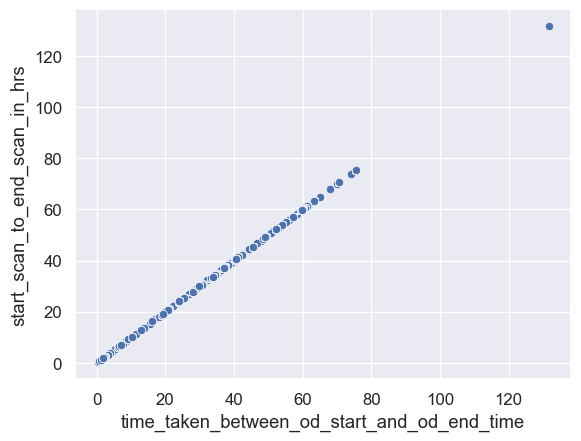

In [232]:
sns.scatterplot(x="time_taken_between_od_start_and_od_end_time", y="start_scan_to_end_scan_in_hrs", data=df, palette=['green','red'])

- Overall **conclusion on the difference between "time_taken_between_od_start_and_od_end_time" and "start_scan_to_end_scan"**
 - Based on both statistical and visual analysis both features **"time_taken_between_od_start_and_od_end_time" and "start_scan_to_end_scan"** are same
 - We **can drop new feature "time_taken_between_od_start_and_od_end_time"**

### Hypothesis testing/ visual analysis between "actual_time_aggregated"  and "osrm_time_aggregated" value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

- **Sample T-Test** to check if there is a difference between "actual_time_aggregated" and "osrm_time_aggregated"
  - **Define H0 and Ha**
      - **Null hypothesis (H0)** : **Group means** of "actual_time_aggregated" and "osrm_time_aggregated" are **equal**
      - **Alternate hypothesis (Ha)** : **Group means** of "actual_time_aggregated" and "osrm_time_aggregated" are **NOT equal**

  - **Define experiment and "sensible" (i.e. distribution of test under H0) test statistics**
      - **Two sample T-test (Independent)** . 
          - Note : Could have used z-test as well because sample size is more than 30. However , T-test will be turnout to Z-Test as sample size is large (i.e. more than 10k)
      - Independent T-Test : Two diffrent random variable (i.e. "actual_time_aggregated" and "osrm_time_aggregated")  being tested 
  - **Decide One sided / two-sided tail test**
      - Two-sided as in Ha the measure is "not equal", we're neither checking greater nor lesser
  - **Define alfa (significance level)**
      - Let's assume significance level(alpha value) as 5%
  - **Calculate p-value**

In [233]:
stats.ttest_ind(df_agg["actual_time_aggregated"],df_agg["osrm_time_aggregated"])

Ttest_indResult(statistic=14.073444960610715, pvalue=7.714905383019579e-45)

- **T-Test Analysis**
   - **Conclusion**
      - Reject Null hupothesis as p value is 7.714905383019579e-45 i.e. less than alpha value .05
      - **"actual_time_aggregated" and "osrm_time_aggregated" are two different features**
      - **Need to reatin both features i.e. "actual_time_aggregated" and "osrm_time_aggregated"**

<AxesSubplot:xlabel='actual_time_aggregated', ylabel='osrm_time_aggregated'>

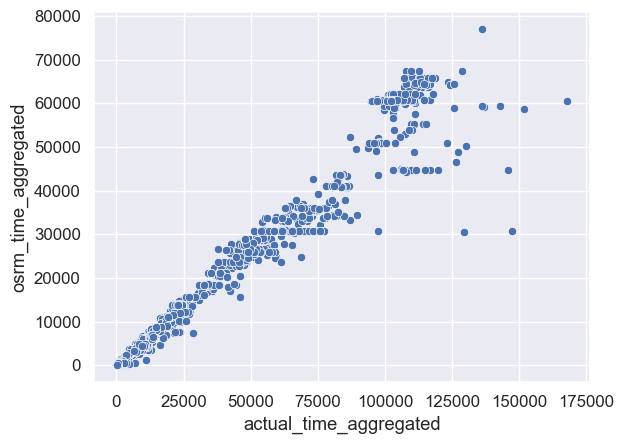

In [234]:
sns.scatterplot(x="actual_time_aggregated", y="osrm_time_aggregated", data=df_agg)

### Compare feature **actual_time vs segment_actual_time**  

In [235]:
stats.ttest_ind(df_agg["actual_time_aggregated"],df_agg["segment_actual_time_aggregated"])

Ttest_indResult(statistic=29.75724632324628, pvalue=9.305532733717133e-192)

<AxesSubplot:xlabel='actual_time_aggregated', ylabel='segment_actual_time_aggregated'>

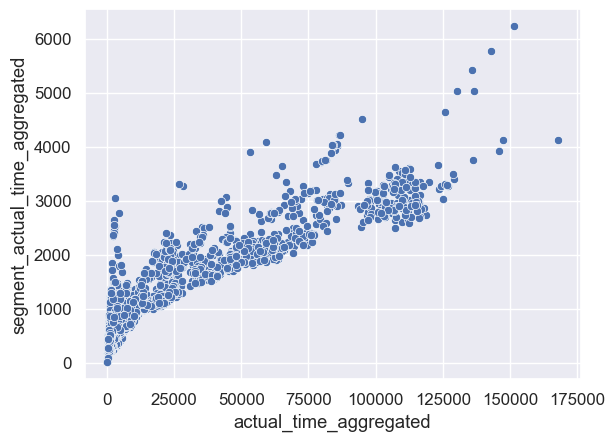

In [236]:
sns.scatterplot(x="actual_time_aggregated", y="segment_actual_time_aggregated", data=df_agg)

- **T-Test Analysis**
   - **Conclusion**
      - Reject Null hupothesis as p value is 9.305532733717133e-192 i.e. less than alpha value .05
      - **"actual_time_aggregated" and "segment_actual_time_aggregated" are two different features**
      - **Need to reatin both features i.e. "actual_time_aggregated" and "segment_actual_time_aggregated"**

### Compare feature **osrm_distance vs segment_osrm_distance**

In [237]:
stats.ttest_ind(df_agg["osrm_distance_aggregated"],df_agg["segment_osrm_distance_aggregated"])

Ttest_indResult(statistic=28.952997899197353, pvalue=8.78329034932333e-182)

<AxesSubplot:xlabel='osrm_distance_aggregated', ylabel='segment_osrm_distance_aggregated'>

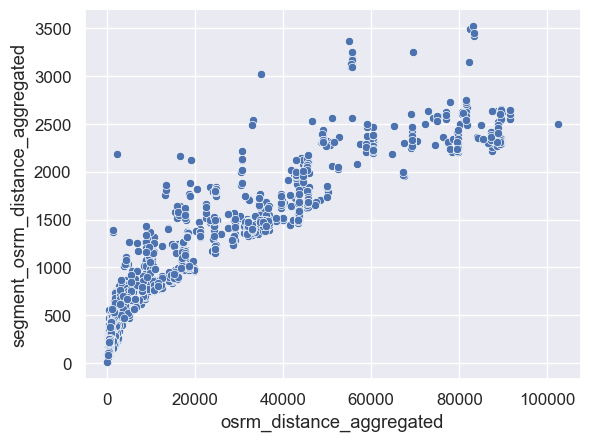

In [238]:
sns.scatterplot(x="osrm_distance_aggregated", y="segment_osrm_distance_aggregated", data=df_agg)

- **T-Test Analysis**
   - **Conclusion**
      - Reject Null hupothesis as p value is 8.78329034932333e-182 i.e. less than alpha value .05
      - **"osrm_distance_aggregated" and "segment_osrm_distance_aggregated" are two different features**
      - **Need to reatin both features i.e. "osrm_distance_aggregated" and "segment_osrm_distance_aggregated"**

### Compare feature **osrm_time vs segment_osrm_time**

In [239]:
stats.ttest_ind(df_agg["osrm_time_aggregated"],df_agg["segment_osrm_time_aggregated"])

Ttest_indResult(statistic=29.19742674380395, pvalue=8.695112641096768e-185)

- **T-Test Analysis**
   - **Conclusion**
      - Reject Null hupothesis as p value is 8.695112641096768e-185 i.e. less than alpha value .05
      - **"osrm_time_aggregated" and "segment_osrm_time_aggregated" are two different features**
      - **Need to reatin both features i.e. "osrm_time_aggregated" and "segment_osrm_time_aggregated"**

<AxesSubplot:xlabel='osrm_time_aggregated', ylabel='segment_osrm_time_aggregated'>

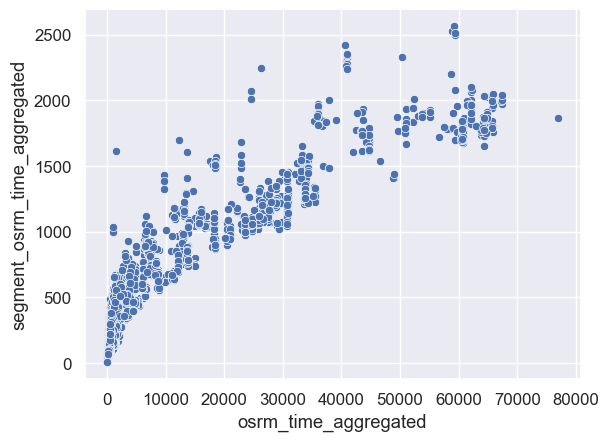

In [240]:
sns.scatterplot(x="osrm_time_aggregated", y="segment_osrm_time_aggregated", data=df_agg)

- **Visual Analysis**
   - **Conclusion**
      - Follows close linear relationship to some time range 
      - Beyond that range , **"actual_time_aggregated" and "osrm_time_aggregated" varies differently** 

### Compare feature **osrm_time_diff vs actual_time_diff** 

- **Hypothesis**
  - Null hypothesis - Mean of **osrm_time_diff time and actual_time_diff have no diffrence**
  - Alternate hypothesis - Mean of **osrm_time_diff time and actual_time_diff have diffrence**

In [63]:
stats.ttest_ind(df_agg_by_trip_src_dest_center_merged["osrm_time_diff"],df_agg_by_trip_src_dest_center_merged["actual_time_diff"])

Ttest_indResult(statistic=-33.067911482916315, pvalue=2.3296445482665114e-237)

<AxesSubplot:xlabel='osrm_time_diff', ylabel='actual_time_diff'>

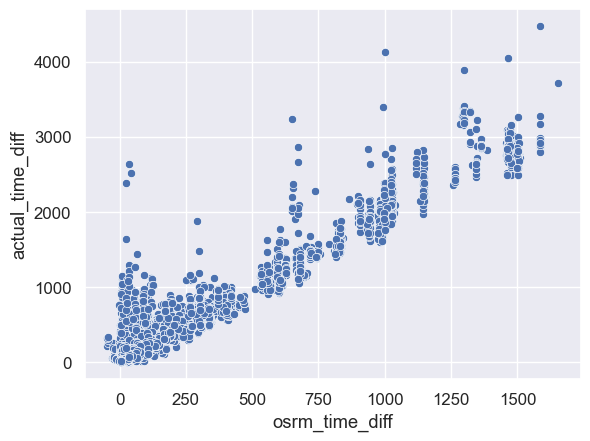

In [64]:
sns.scatterplot(x="osrm_time_diff", y="actual_time_diff", data=df_agg_by_trip_src_dest_center_merged)

- **Visual Analysis**
   - **Conclusion**
      - Follows random linear relationship to some time range 
      - Beyond that range , **"osrm_time_diff" and "actual_time_diff" varies differently** 
      - **More accurate predictions required for better estimate of time**
      - Need to observe orders which are following accurate relationship and take more such orders 

### Comparison & Visualization of time and distance fields

In [241]:
distance_feature_list = [ "start_scan_to_end_scan","actual_distance_to_destination","osrm_distance","segment_osrm_distance"]
time_feature_list= ["actual_time","osrm_time","segment_actual_time","segment_osrm_time"]

#### Full truck load

<AxesSubplot:xlabel='actual_distance_to_destination', ylabel='actual_time'>

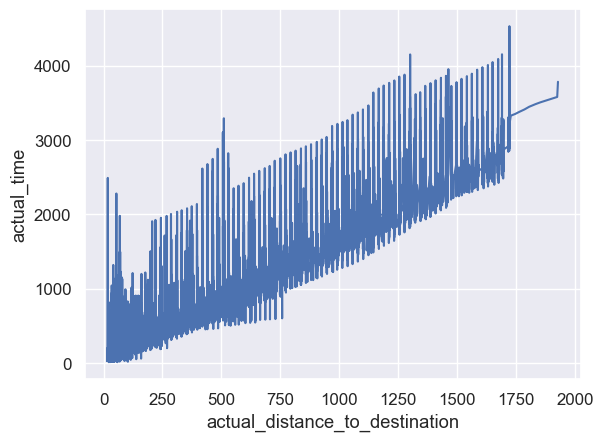

In [242]:
sns.lineplot(x="actual_distance_to_destination", y="actual_time",data = df_full_truck_load)

<AxesSubplot:xlabel='actual_distance_to_destination', ylabel='osrm_time'>

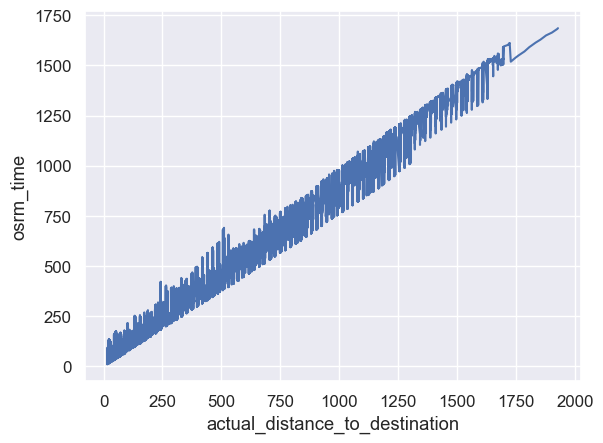

In [243]:
sns.lineplot(x="actual_distance_to_destination", y="osrm_time",data = df_full_truck_load)

<AxesSubplot:xlabel='osrm_distance', ylabel='actual_time'>

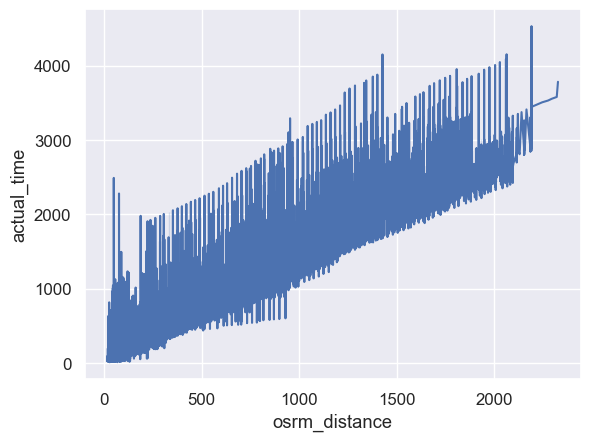

In [244]:
sns.lineplot(x="osrm_distance", y="actual_time",data = df_full_truck_load)

<AxesSubplot:xlabel='osrm_distance', ylabel='osrm_time'>

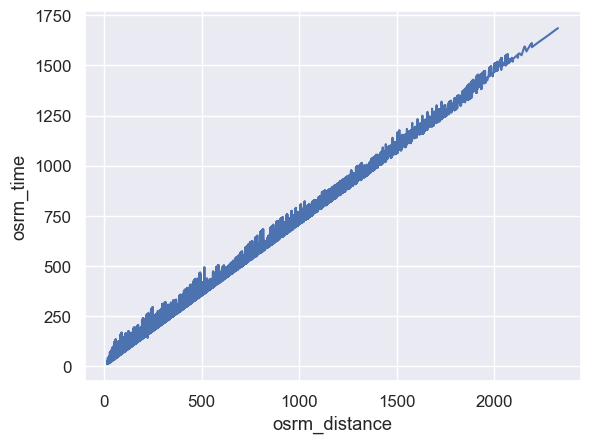

In [245]:
sns.lineplot(x="osrm_distance", y="osrm_time",data = df_full_truck_load)

<AxesSubplot:xlabel='start_scan_to_end_scan', ylabel='actual_time'>

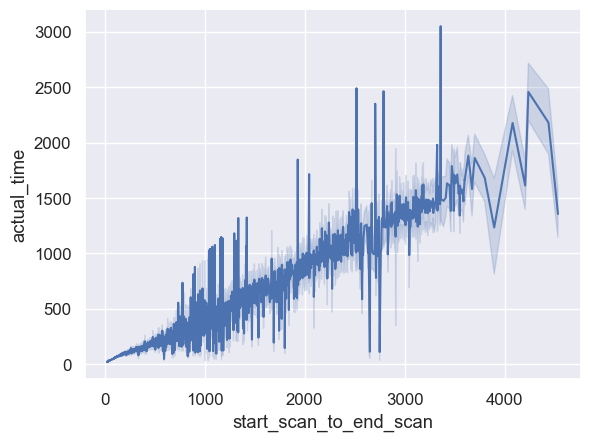

In [246]:
sns.lineplot(x="start_scan_to_end_scan", y="actual_time",data = df_full_truck_load)

<AxesSubplot:xlabel='start_scan_to_end_scan', ylabel='osrm_time'>

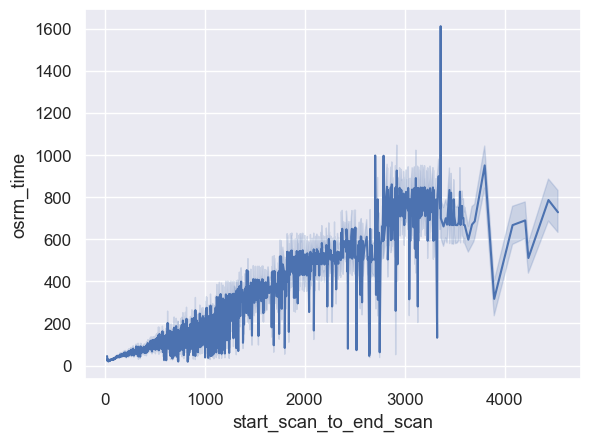

In [247]:
sns.lineplot(x="start_scan_to_end_scan", y="osrm_time",data = df_full_truck_load)

### Carting 

<AxesSubplot:xlabel='actual_distance_to_destination', ylabel='actual_time'>

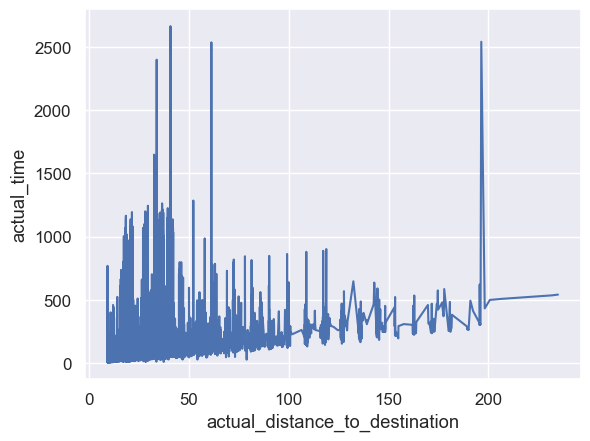

In [248]:
sns.lineplot(x="actual_distance_to_destination", y="actual_time",data = df_carting)

<AxesSubplot:xlabel='actual_distance_to_destination', ylabel='osrm_time'>

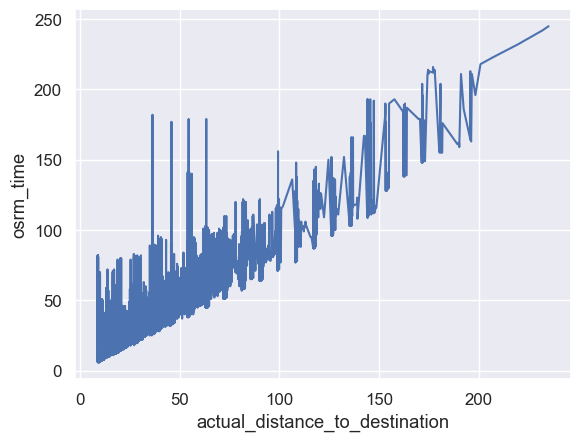

In [249]:
sns.lineplot(x="actual_distance_to_destination", y="osrm_time",data = df_carting)

<AxesSubplot:xlabel='osrm_distance', ylabel='actual_time'>

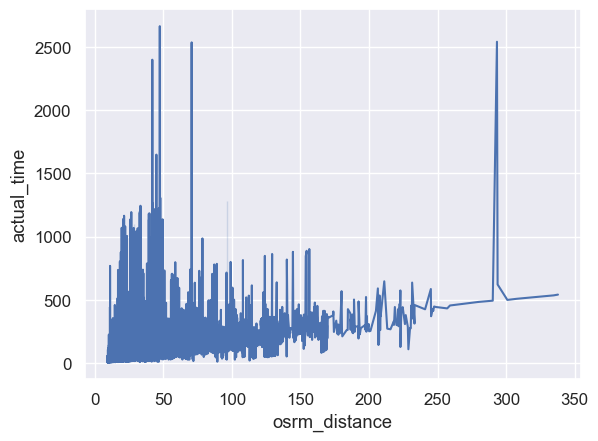

In [250]:
sns.lineplot(x="osrm_distance", y="actual_time",data = df_carting)

<AxesSubplot:xlabel='osrm_distance', ylabel='osrm_time'>

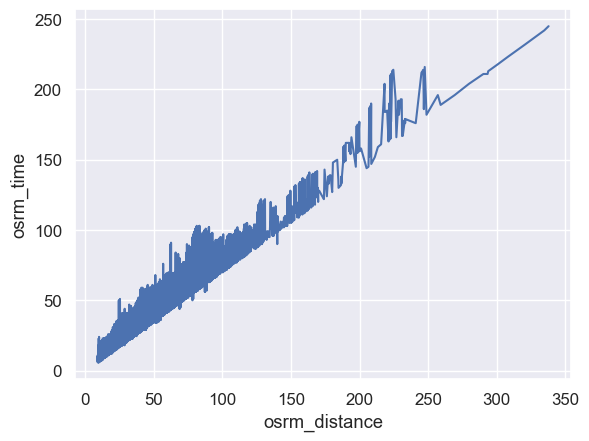

In [251]:
sns.lineplot(x="osrm_distance", y="osrm_time",data = df_carting)

<AxesSubplot:xlabel='start_scan_to_end_scan', ylabel='actual_time'>

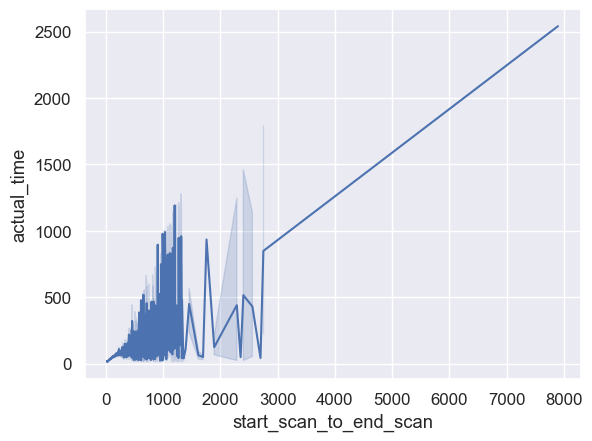

In [252]:
sns.lineplot(x="start_scan_to_end_scan", y="actual_time",data = df_carting)

<AxesSubplot:xlabel='start_scan_to_end_scan', ylabel='osrm_time'>

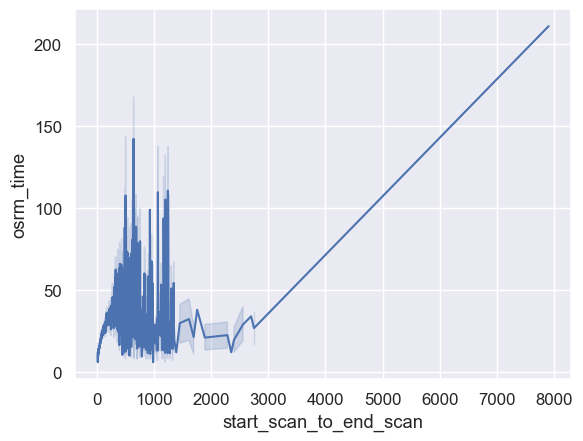

In [253]:
sns.lineplot(x="start_scan_to_end_scan", y="osrm_time",data = df_carting)

- **Conclusion** 
 - **Approximate Linear relationship observed** between following **distance and time features**
    - "actual_distance_to_destination" vs "osrm_time"
    - "osrm_distance" vs "osrm_time"
    - "start_scan_to_end_scan" vs "actual_time"
    - "osrm_distance" vs "osrm_time"

### Outlier Detection and treatment

- Find outliers in the numerical variables and check it using visual analysis

In [254]:
continious_features = df.select_dtypes(include=['int64','float64']).columns
continious_features

Index(['start_scan_to_end_scan', 'cutoff_factor',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'factor', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_factor', 'trip_creation_time_year',
       'trip_creation_time_weekday', 'trip_creation_time_day',
       'od_start_time_year', 'od_start_time_weekday', 'od_start_time_day',
       'od_end_time_year', 'od_end_time_weekday', 'od_end_time_day',
       'time_taken_between_od_start_and_od_end_time',
       'start_scan_to_end_scan_in_hrs'],
      dtype='object')

In [255]:
def find_outliers_IQR(column_name):
    print("Outliers by feature name --> ",column_name)
    # calculating quartiles 
    Q1=df[column_name].quantile(0.25)
    Q3=df[column_name].quantile(0.75)
    # calculating inter quartile range 
    IQR=Q3-Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    # filtering data that is outside inter quartile range
    outliers = df[((df[column_name]<lower) | (df[column_name]>upper))]

    return outliers

In [256]:
for feature_name in continious_features:
    print(find_outliers_IQR(feature_name))

Outliers by feature name -->  start_scan_to_end_scan
            data         trip_creation_time  \
32950   training 2018-09-13 01:28:45.326644   
32951   training 2018-09-13 01:28:45.326644   
32952   training 2018-09-13 01:28:45.326644   
32953   training 2018-09-13 01:28:45.326644   
32954   training 2018-09-13 01:28:45.326644   
...          ...                        ...   
79524   training 2018-09-19 13:44:58.665210   
79525   training 2018-09-19 13:44:58.665210   
79526   training 2018-09-19 13:44:58.665210   
79527   training 2018-09-19 13:44:58.665210   
123196      test 2018-10-01 23:35:54.432745   

                                      route_schedule_uuid route_type  \
32950   thanos::sroute:6b87651c-fdf4-432f-bf80-0e394f3...        FTL   
32951   thanos::sroute:6b87651c-fdf4-432f-bf80-0e394f3...        FTL   
32952   thanos::sroute:6b87651c-fdf4-432f-bf80-0e394f3...        FTL   
32953   thanos::sroute:6b87651c-fdf4-432f-bf80-0e394f3...        FTL   
32954   thanos::sroute

            data         trip_creation_time  \
404     training 2018-09-25 15:06:59.975279   
405     training 2018-09-25 15:06:59.975279   
406     training 2018-09-25 15:06:59.975279   
407     training 2018-09-25 15:06:59.975279   
408     training 2018-09-25 15:06:59.975279   
...          ...                        ...   
144796      test 2018-10-01 18:17:37.047270   
144797      test 2018-10-01 18:17:37.047270   
144798      test 2018-10-01 18:17:37.047270   
144799      test 2018-10-01 18:17:37.047270   
144800      test 2018-10-01 18:17:37.047270   

                                      route_schedule_uuid route_type  \
404     thanos::sroute:51d8aa58-9b5b-4bc2-81e9-bb284c6...        FTL   
405     thanos::sroute:51d8aa58-9b5b-4bc2-81e9-bb284c6...        FTL   
406     thanos::sroute:51d8aa58-9b5b-4bc2-81e9-bb284c6...        FTL   
407     thanos::sroute:51d8aa58-9b5b-4bc2-81e9-bb284c6...        FTL   
408     thanos::sroute:51d8aa58-9b5b-4bc2-81e9-bb284c6...        FTL   
...

            data         trip_creation_time  \
32950   training 2018-09-13 01:28:45.326644   
32951   training 2018-09-13 01:28:45.326644   
32952   training 2018-09-13 01:28:45.326644   
32953   training 2018-09-13 01:28:45.326644   
32954   training 2018-09-13 01:28:45.326644   
...          ...                        ...   
79524   training 2018-09-19 13:44:58.665210   
79525   training 2018-09-19 13:44:58.665210   
79526   training 2018-09-19 13:44:58.665210   
79527   training 2018-09-19 13:44:58.665210   
123196      test 2018-10-01 23:35:54.432745   

                                      route_schedule_uuid route_type  \
32950   thanos::sroute:6b87651c-fdf4-432f-bf80-0e394f3...        FTL   
32951   thanos::sroute:6b87651c-fdf4-432f-bf80-0e394f3...        FTL   
32952   thanos::sroute:6b87651c-fdf4-432f-bf80-0e394f3...        FTL   
32953   thanos::sroute:6b87651c-fdf4-432f-bf80-0e394f3...        FTL   
32954   thanos::sroute:6b87651c-fdf4-432f-bf80-0e394f3...        FTL   
...

In [257]:
continious_features

Index(['start_scan_to_end_scan', 'cutoff_factor',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'factor', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_factor', 'trip_creation_time_year',
       'trip_creation_time_weekday', 'trip_creation_time_day',
       'od_start_time_year', 'od_start_time_weekday', 'od_start_time_day',
       'od_end_time_year', 'od_end_time_weekday', 'od_end_time_day',
       'time_taken_between_od_start_and_od_end_time',
       'start_scan_to_end_scan_in_hrs'],
      dtype='object')

In [258]:
find_outliers_IQR("actual_time")

Outliers by feature name -->  actual_time


,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,source_name_city,source_name_place,source_name_code,source_name_state,destination_name_city,destination_name_place,destination_name_code,destination_name_state,time_taken_between_od_start_and_od_end_time,start_scan_to_end_scan_in_hrs
406,training,2018-09-25 15:06:59.975279,thanos::sroute:51d8aa58-9b5b-4bc2-81e9-bb284c6...,FTL,trip-153788801997503817,IND825409AAA,JhumriTlya_RadhaCpx_D (Jharkhand),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-26 03:15:43.970231,...,JhumriTlya,RadhaCpx,D,Jharkhand,Gurgaon,Bilaspur,HB,Haryana,25.852,25.85
407,training,2018-09-25 15:06:59.975279,thanos::sroute:51d8aa58-9b5b-4bc2-81e9-bb284c6...,FTL,trip-153788801997503817,IND825409AAA,JhumriTlya_RadhaCpx_D (Jharkhand),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-26 03:15:43.970231,...,JhumriTlya,RadhaCpx,D,Jharkhand,Gurgaon,Bilaspur,HB,Haryana,25.852,25.85
408,training,2018-09-25 15:06:59.975279,thanos::sroute:51d8aa58-9b5b-4bc2-81e9-bb284c6...,FTL,trip-153788801997503817,IND825409AAA,JhumriTlya_RadhaCpx_D (Jharkhand),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-26 03:15:43.970231,...,JhumriTlya,RadhaCpx,D,Jharkhand,Gurgaon,Bilaspur,HB,Haryana,25.852,25.85
409,training,2018-09-25 15:06:59.975279,thanos::sroute:51d8aa58-9b5b-4bc2-81e9-bb284c6...,FTL,trip-153788801997503817,IND825409AAA,JhumriTlya_RadhaCpx_D (Jharkhand),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-26 03:15:43.970231,...,JhumriTlya,RadhaCpx,D,Jharkhand,Gurgaon,Bilaspur,HB,Haryana,25.852,25.85
410,training,2018-09-25 15:06:59.975279,thanos::sroute:51d8aa58-9b5b-4bc2-81e9-bb284c6...,FTL,trip-153788801997503817,IND825409AAA,JhumriTlya_RadhaCpx_D (Jharkhand),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-26 03:15:43.970231,...,JhumriTlya,RadhaCpx,D,Jharkhand,Gurgaon,Bilaspur,HB,Haryana,25.852,25.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144796,test,2018-10-01 18:17:37.047270,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153841785704702048,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND562132AAA,Bangalore_Nelmngla_H (Karnataka),2018-10-02 09:02:19.284969,...,Gurgaon,Bilaspur,HB,Haryana,Bengaluru,Nelmngla,H,Karnataka,49.162,49.15
144797,test,2018-10-01 18:17:37.047270,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153841785704702048,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND562132AAA,Bangalore_Nelmngla_H (Karnataka),2018-10-02 09:02:19.284969,...,Gurgaon,Bilaspur,HB,Haryana,Bengaluru,Nelmngla,H,Karnataka,49.162,49.15
144798,test,2018-10-01 18:17:37.047270,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153841785704702048,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND562132AAA,Bangalore_Nelmngla_H (Karnataka),2018-10-02 09:02:19.284969,...,Gurgaon,Bilaspur,HB,Haryana,Bengaluru,Nelmngla,H,Karnataka,49.162,49.15
144799,test,2018-10-01 18:17:37.047270,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153841785704702048,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND562132AAA,Bangalore_Nelmngla_H (Karnataka),2018-10-02 09:02:19.284969,...,Gurgaon,Bilaspur,HB,Haryana,Bengaluru,Nelmngla,H,Karnataka,49.162,49.15


In [259]:
find_outliers_IQR("segment_actual_time")

Outliers by feature name -->  segment_actual_time


,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,source_name_city,source_name_place,source_name_code,source_name_state,destination_name_city,destination_name_place,destination_name_code,destination_name_state,time_taken_between_od_start_and_od_end_time,start_scan_to_end_scan_in_hrs
21,training,2018-09-13 20:44:19.424489,thanos::sroute:76951383-1608-44e4-a284-46d92e8...,FTL,trip-153687145942424248,IND560099AAB,Bengaluru_Bomsndra_HB (Karnataka),IND683511AAA,Aluva_Peedika_H (Kerala),2018-09-13 23:59:56.061158,...,Bengaluru,Bomsndra,HB,Karnataka,Aluva,Peedika,H,Kerala,13.934,13.933
34,training,2018-09-13 20:44:19.424489,thanos::sroute:76951383-1608-44e4-a284-46d92e8...,FTL,trip-153687145942424248,IND560099AAB,Bengaluru_Bomsndra_HB (Karnataka),IND683511AAA,Aluva_Peedika_H (Kerala),2018-09-13 23:59:56.061158,...,Bengaluru,Bomsndra,HB,Karnataka,Aluva,Peedika,H,Kerala,13.934,13.933
72,test,2018-10-01 16:00:45.719099,thanos::sroute:182fdad4-dc74-4c7d-ada4-0a76d4c...,FTL,trip-153840964571880594,IND131028AAB,Sonipat_Kundli_H (Haryana),IND247667AAB,Roorkee_IOTCEncl_L (Uttarakhand),2018-10-01 16:00:45.719099,...,Sonipat,Kundli,H,Haryana,Roorkee,IOTCEncl,L,Uttarakhand,7.719,7.717
73,test,2018-10-01 16:00:45.719099,thanos::sroute:182fdad4-dc74-4c7d-ada4-0a76d4c...,FTL,trip-153840964571880594,IND247667AAB,Roorkee_IOTCEncl_L (Uttarakhand),IND249407AAA,Haridwar (Uttarakhand),2018-10-01 23:55:44.909377,...,Roorkee,IOTCEncl,L,Uttarakhand,NaN,NaN,NaN,NaN,1.871,1.867
106,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND306401AAB,Pali_Nayagaon_I (Rajasthan),IND342005AAD,Jodhpur_Basni_I (Rajasthan),2018-09-25 21:31:00.741991,...,Pali,Nayagaon,I,Rajasthan,Jodhpur,Basni,I,Rajasthan,2.849,2.833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144790,test,2018-10-01 18:17:37.047270,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153841785704702048,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND562132AAA,Bangalore_Nelmngla_H (Karnataka),2018-10-02 09:02:19.284969,...,Gurgaon,Bilaspur,HB,Haryana,Bengaluru,Nelmngla,H,Karnataka,49.162,49.150
144819,training,2018-09-26 14:05:52.096792,thanos::sroute:f7de4133-6bd9-4367-a7f7-ab190b6...,FTL,trip-153797075209653066,IND413401AAA,Barshi_Kurduwdi_D (Maharashtra),IND411033AAA,Pune_Tathawde_H (Maharashtra),2018-09-27 02:21:39.762995,...,Barshi,Kurduwdi,D,Maharashtra,Pune,Tathawde,H,Maharashtra,6.224,6.217
144848,training,2018-09-14 18:45:34.164734,thanos::sroute:40b6dc9c-faa1-4753-8bc8-ac8c3e0...,Carting,trip-153695073416451616,IND400102AAB,Mumbai_Jogeshwri_L (Maharashtra),IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),2018-09-14 18:45:34.164734,...,Mumbai,Jogeshwri,L,Maharashtra,Bhiwandi,Mankoli,HB,Maharashtra,6.565,6.550
144853,training,2018-09-22 11:30:41.399439,thanos::sroute:d81088e2-9ccd-43e9-9260-3e85633...,FTL,trip-153761584139918815,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND411033AAA,Pune_Tathawde_H (Maharashtra),2018-09-22 11:30:41.399439,...,Bhiwandi,Mankoli,HB,Maharashtra,Pune,Tathawde,H,Maharashtra,10.240,10.233


In [260]:
find_outliers_IQR("actual_time")

Outliers by feature name -->  actual_time


,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,source_name_city,source_name_place,source_name_code,source_name_state,destination_name_city,destination_name_place,destination_name_code,destination_name_state,time_taken_between_od_start_and_od_end_time,start_scan_to_end_scan_in_hrs
406,training,2018-09-25 15:06:59.975279,thanos::sroute:51d8aa58-9b5b-4bc2-81e9-bb284c6...,FTL,trip-153788801997503817,IND825409AAA,JhumriTlya_RadhaCpx_D (Jharkhand),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-26 03:15:43.970231,...,JhumriTlya,RadhaCpx,D,Jharkhand,Gurgaon,Bilaspur,HB,Haryana,25.852,25.85
407,training,2018-09-25 15:06:59.975279,thanos::sroute:51d8aa58-9b5b-4bc2-81e9-bb284c6...,FTL,trip-153788801997503817,IND825409AAA,JhumriTlya_RadhaCpx_D (Jharkhand),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-26 03:15:43.970231,...,JhumriTlya,RadhaCpx,D,Jharkhand,Gurgaon,Bilaspur,HB,Haryana,25.852,25.85
408,training,2018-09-25 15:06:59.975279,thanos::sroute:51d8aa58-9b5b-4bc2-81e9-bb284c6...,FTL,trip-153788801997503817,IND825409AAA,JhumriTlya_RadhaCpx_D (Jharkhand),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-26 03:15:43.970231,...,JhumriTlya,RadhaCpx,D,Jharkhand,Gurgaon,Bilaspur,HB,Haryana,25.852,25.85
409,training,2018-09-25 15:06:59.975279,thanos::sroute:51d8aa58-9b5b-4bc2-81e9-bb284c6...,FTL,trip-153788801997503817,IND825409AAA,JhumriTlya_RadhaCpx_D (Jharkhand),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-26 03:15:43.970231,...,JhumriTlya,RadhaCpx,D,Jharkhand,Gurgaon,Bilaspur,HB,Haryana,25.852,25.85
410,training,2018-09-25 15:06:59.975279,thanos::sroute:51d8aa58-9b5b-4bc2-81e9-bb284c6...,FTL,trip-153788801997503817,IND825409AAA,JhumriTlya_RadhaCpx_D (Jharkhand),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-26 03:15:43.970231,...,JhumriTlya,RadhaCpx,D,Jharkhand,Gurgaon,Bilaspur,HB,Haryana,25.852,25.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144796,test,2018-10-01 18:17:37.047270,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153841785704702048,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND562132AAA,Bangalore_Nelmngla_H (Karnataka),2018-10-02 09:02:19.284969,...,Gurgaon,Bilaspur,HB,Haryana,Bengaluru,Nelmngla,H,Karnataka,49.162,49.15
144797,test,2018-10-01 18:17:37.047270,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153841785704702048,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND562132AAA,Bangalore_Nelmngla_H (Karnataka),2018-10-02 09:02:19.284969,...,Gurgaon,Bilaspur,HB,Haryana,Bengaluru,Nelmngla,H,Karnataka,49.162,49.15
144798,test,2018-10-01 18:17:37.047270,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153841785704702048,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND562132AAA,Bangalore_Nelmngla_H (Karnataka),2018-10-02 09:02:19.284969,...,Gurgaon,Bilaspur,HB,Haryana,Bengaluru,Nelmngla,H,Karnataka,49.162,49.15
144799,test,2018-10-01 18:17:37.047270,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153841785704702048,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND562132AAA,Bangalore_Nelmngla_H (Karnataka),2018-10-02 09:02:19.284969,...,Gurgaon,Bilaspur,HB,Haryana,Bengaluru,Nelmngla,H,Karnataka,49.162,49.15


- **Conclusion** 
 - **Outliers impacts mean based statistical methods**
 - **Observation during outlier removal** 
  - **There are outliers in almost every features**
  - **Removing** those **outliers iteratively , can result loss of significant feature**
  - **Need domain expert consultation** before removing indepndent feature based outliers
  - Hence **proceeding with Baseline analysis with outliers**
  - Moreover, certain deep learning model can work without outliers , hence skipping outlier removal

### Checking relationship between aggregated fields

<AxesSubplot:xlabel='osrm_distance_aggregated', ylabel='osrm_time_aggregated'>

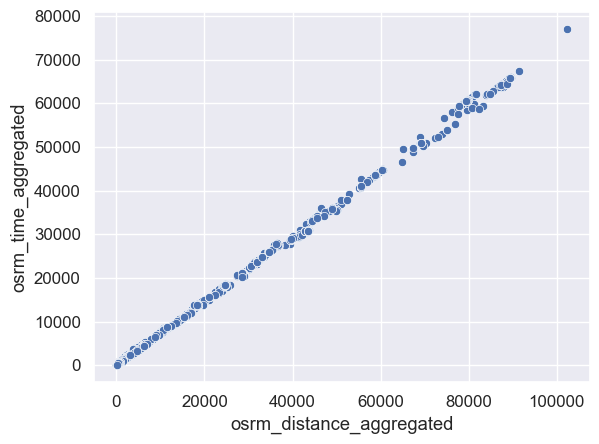

In [261]:
sns.scatterplot(x="osrm_distance_aggregated", y="osrm_time_aggregated", data=df_agg)

<AxesSubplot:xlabel='segment_osrm_distance_aggregated', ylabel='segment_osrm_time_aggregated'>

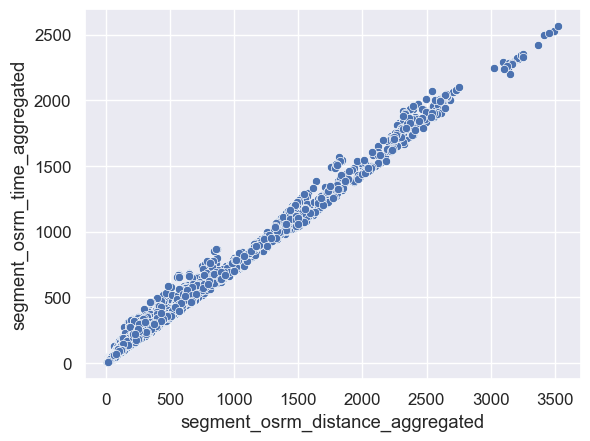

In [262]:
sns.scatterplot(x="segment_osrm_distance_aggregated", y="segment_osrm_time_aggregated", data=df_agg)

<AxesSubplot:xlabel='osrm_distance_aggregated', ylabel='actual_time_aggregated'>

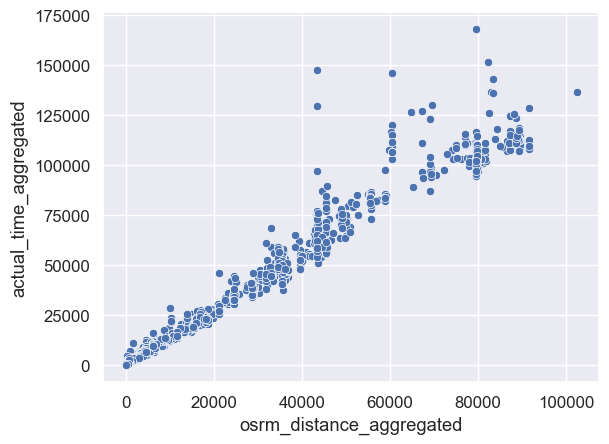

In [263]:
sns.scatterplot(x="osrm_distance_aggregated", y="actual_time_aggregated", data=df_agg)

- **Conclusion** 
 - **Approximate Linear relationship observed** between following **aggregated features**
    - "osrm_distance_aggregated" vs "osrm_time_aggregated"
    - "segment_osrm_distance_aggregated" vs "segment_osrm_time_aggregated"
    -  "osrm_distance_aggregated" vs "actual_time_aggregated"

### Handling categorical values

- Categorical to Numerical encoding

In [264]:
df["route_type"].value_counts()

FTL        99660
Carting    45207
Name: route_type, dtype: int64

In [265]:
from sklearn.preprocessing import LabelEncoder
# Running level encoding for convertion from categorical to numerical data for feeding to model
label_encoder = LabelEncoder()
col='route_type'
df[col] = label_encoder.fit_transform(df[col])

In [266]:
df["route_type"].value_counts()

1    99660
0    45207
Name: route_type, dtype: int64

### Column Normalization /Column Standardization

- Normalize/ Standardize the numerical 
    - MinMaxScaler 
    - StandardScaler.

In [267]:
continious_features

Index(['start_scan_to_end_scan', 'cutoff_factor',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'factor', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_factor', 'trip_creation_time_year',
       'trip_creation_time_weekday', 'trip_creation_time_day',
       'od_start_time_year', 'od_start_time_weekday', 'od_start_time_day',
       'od_end_time_year', 'od_end_time_weekday', 'od_end_time_day',
       'time_taken_between_od_start_and_od_end_time',
       'start_scan_to_end_scan_in_hrs'],
      dtype='object')

In [268]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
std_data = scaler.fit_transform(df[continious_features])
std_data = pd.DataFrame(std_data, columns=continious_features)
std_data.head()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,...,trip_creation_time_weekday,trip_creation_time_day,od_start_time_year,od_start_time_weekday,od_start_time_day,od_end_time_year,od_end_time_weekday,od_end_time_day,time_taken_between_od_start_and_od_end_time,start_scan_to_end_scan_in_hrs
0,-0.844026,-0.649525,-0.648246,-0.673677,-0.658642,-0.647814,-0.493980,-0.414331,-0.508094,-0.608251,...,0.042295,0.204383,0.0,0.024946,0.205022,0.0,-0.001732,0.21444,-0.844293,-0.844046
1,-0.844026,-0.623419,-0.623604,-0.656958,-0.629422,-0.624640,-0.536376,-0.488998,-0.643449,-0.731779,...,0.042295,0.204383,0.0,0.024946,0.205022,0.0,-0.001732,0.21444,-0.844293,-0.844046
2,-0.844026,-0.597314,-0.598385,-0.630207,-0.603449,-0.598958,-0.403130,-0.376997,-0.778805,-0.672644,...,0.042295,0.204383,0.0,0.024946,0.205022,0.0,-0.001732,0.21444,-0.844293,-0.844046
3,-0.844026,-0.571208,-0.573802,-0.593424,-0.564489,-0.568034,-0.332344,-0.283663,-0.440416,-0.549064,...,0.042295,0.204383,0.0,0.024946,0.205022,0.0,-0.001732,0.21444,-0.844293,-0.844046
4,-0.844026,-0.562506,-0.564329,-0.583392,-0.551502,-0.547479,-0.334993,-0.563666,-0.914160,-1.058963,...,0.042295,0.204383,0.0,0.024946,0.205022,0.0,-0.001732,0.21444,-0.844293,-0.844046


In [269]:
scaler = MinMaxScaler()
max_scaler_data = scaler.fit_transform(df[continious_features])
max_scaler_data = pd.DataFrame(max_scaler_data, columns=continious_features)
max_scaler_data.head()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,...,trip_creation_time_weekday,trip_creation_time_day,od_start_time_year,od_start_time_weekday,od_start_time_day,od_end_time_year,od_end_time_weekday,od_end_time_day,time_taken_between_od_start_and_od_end_time,start_scan_to_end_scan_in_hrs
0,0.008378,0.000000,0.000748,0.001105,0.002976,0.001276,0.014613,0.078300,0.006828,0.005460,...,0.5,0.655172,0.0,0.5,0.655172,0.0,0.5,0.655172,0.008317,0.008378
1,0.008378,0.004692,0.005180,0.003316,0.008333,0.005488,0.013671,0.077086,0.005587,0.004453,...,0.5,0.655172,0.0,0.5,0.655172,0.0,0.5,0.655172,0.008317,0.008378
2,0.008378,0.009385,0.009715,0.006854,0.013095,0.010155,0.016630,0.078907,0.004345,0.004935,...,0.5,0.655172,0.0,0.5,0.655172,0.0,0.5,0.655172,0.008317,0.008378
3,0.008378,0.014077,0.014135,0.011718,0.020238,0.015775,0.018202,0.080425,0.007449,0.005942,...,0.5,0.655172,0.0,0.5,0.655172,0.0,0.5,0.655172,0.008317,0.008378
4,0.008378,0.015641,0.015839,0.013044,0.022619,0.019511,0.018143,0.075873,0.003104,0.001787,...,0.5,0.655172,0.0,0.5,0.655172,0.0,0.5,0.655172,0.008317,0.008378


### Business Insights - Should include patterns observed in the data along with what you can infer from it.

- Relatively **less full truck loads** trips **starting on 5th or 6th day of the month**
- Relatively **large full truck loads** trips **ending on 5th or 6th day of the month**
- Relatively **less full truck loads** trips **ending on 7th or 8th day of the month**
- **Most Time taken route **(i.e. for route type full truck load) to deliver from source to destination are 
  - **Haryana**
  - **Karnataka**
  - **Maharshtra**
  - **Delhi**
  - **Telangana**
- Actual **time taken to complete the delivery** are **high for source/destination 
  - **Haryana**
  - **Karnataka**
  - **Maharshtra**
  - **Delhi**
  - **Telangana**
- Most **distanced cities** for full truck deliveries are **Gurgaon , Bengaluru , Bhiwandi**
- **Most trips** are being **booked** **on 12,13,15,17,18,20,21,22,25,26 days of the month**
- **osrm_time** (i.e. An open-source routing engine calculated time) is **not close to actual time** of delivery
  - **Estimation of delivery time needs more accurate prediction**
  - **Once delivery time is accurately predicted** then **more pre-booking** can be taken up
- Approximate **Linear relationship observed** between **following distance and time features**
  - "actual_distance_to_destination" vs "osrm_time"
  - "osrm_distance" vs "osrm_time"
  - "start_scan_to_end_scan" vs "actual_time"
  - "osrm_distance" vs "osrm_time"

### Check from where most orders are coming from (State, Corridor etc)

In [270]:
df["source_name_city"].value_counts()

Gurgaon         23639
Bengaluru       14206
Bhiwandi         9088
Delhi            4318
Pune             4160
                ...  
Kayamkulam          1
Chikhli             1
Kothanalloor        1
Thirthahalli        1
Soro                1
Name: source_name_city, Length: 560, dtype: int64

In [271]:
selected_features = ['route_type', 'source_center', 'source_name', 'destination_center','destination_name', 'source_name_city', 'source_name_place','source_name_code','source_name_state','destination_name_city','destination_name_place','destination_name_code','destination_name_state']
df_selected = df[selected_features]

In [272]:
# Show percentage values on the top of the bar
def show_values_on_bars(axs, h_v="v", space=1):
    total = float(len(df_selected))
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value='{:.1f}%'.format(100 * p.get_height()/total)
                ax.text(_x, _y, value, ha="center")
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value='{:.1f}%'.format(100 * p.get_width()/total)
                ax.text(_x, _y, value, ha="left")
    if isinstance(axs, np.ndarray):
         for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
            _show_on_single_plot(axs)

In [273]:
# plot top orders by feature name using count plot with percentage displayed on the top
# Top 5 orders are being plotted 
def plot_orders_by_feature(feature_list):    
    for feature_name in feature_list:
        sns.set(style="whitegrid")
        sns.set(font_scale = 1.1)
        plt.figure(figsize=(15,5))
        ax = sns.countplot(x=feature_name,data=df_selected,hue="route_type",order=df_selected[feature_name].value_counts().iloc[:5].index)                
        plt.xlabel(feature_name, fontsize=17)
        plt.ylabel("Number of Orders",fontsize=17)
        plt.title("Most Orders (TOP 5) by "+feature_name,fontdict ={"fontsize": 17})
        show_values_on_bars(ax,h_v="v",space=1)

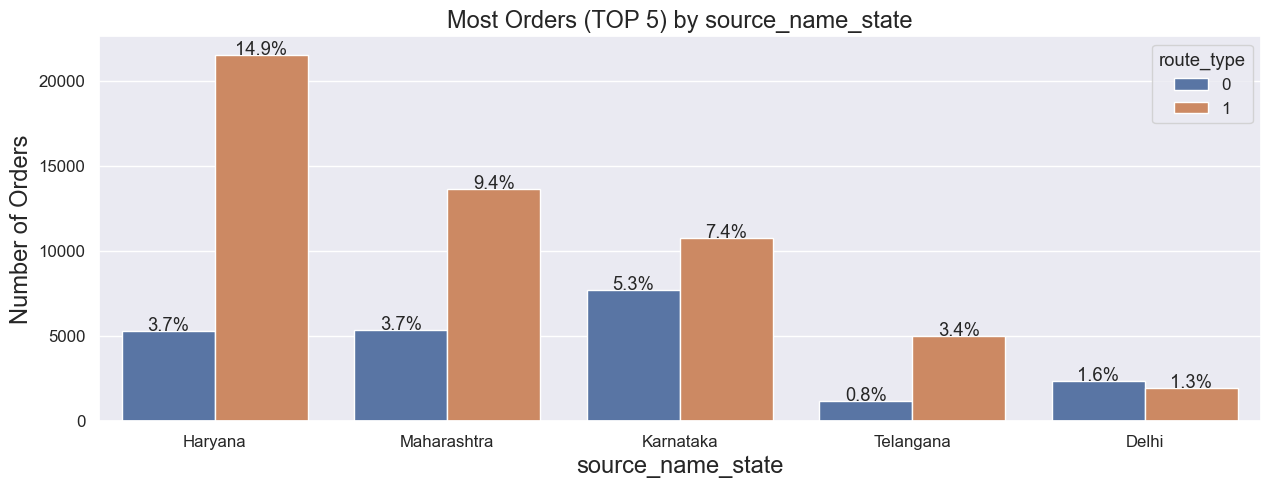

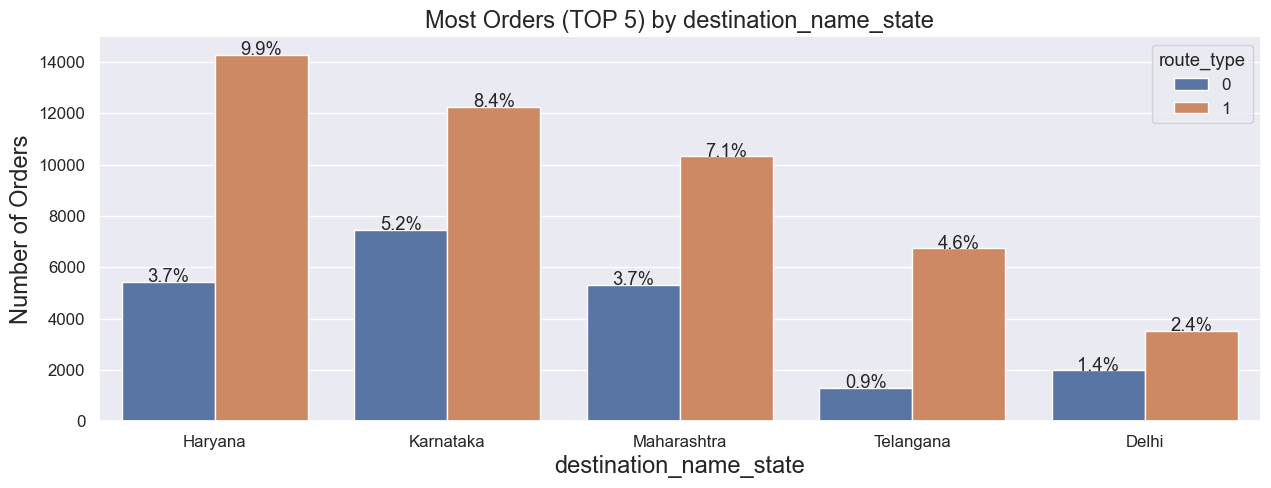

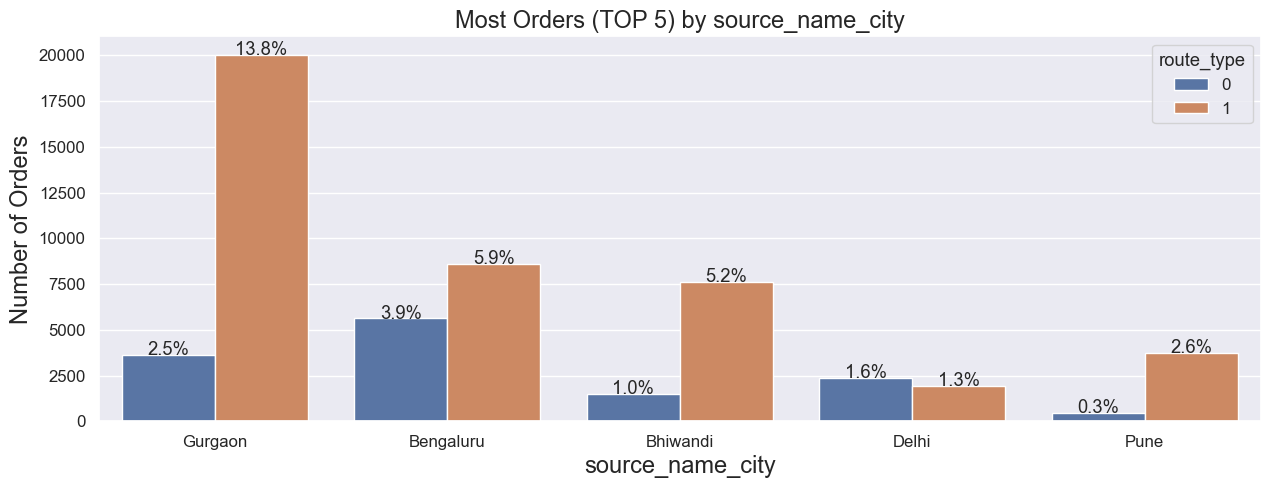

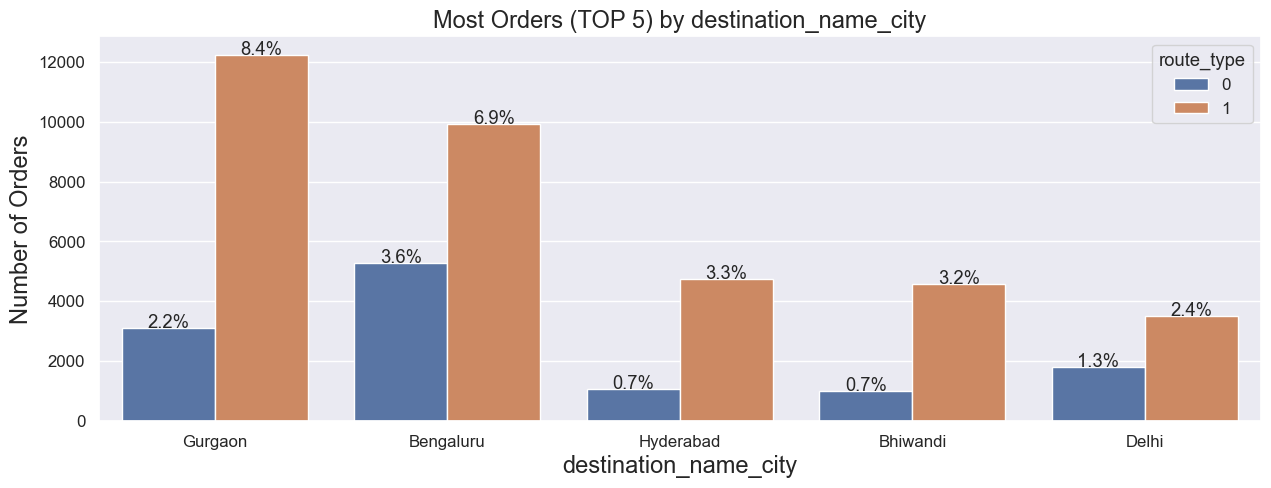

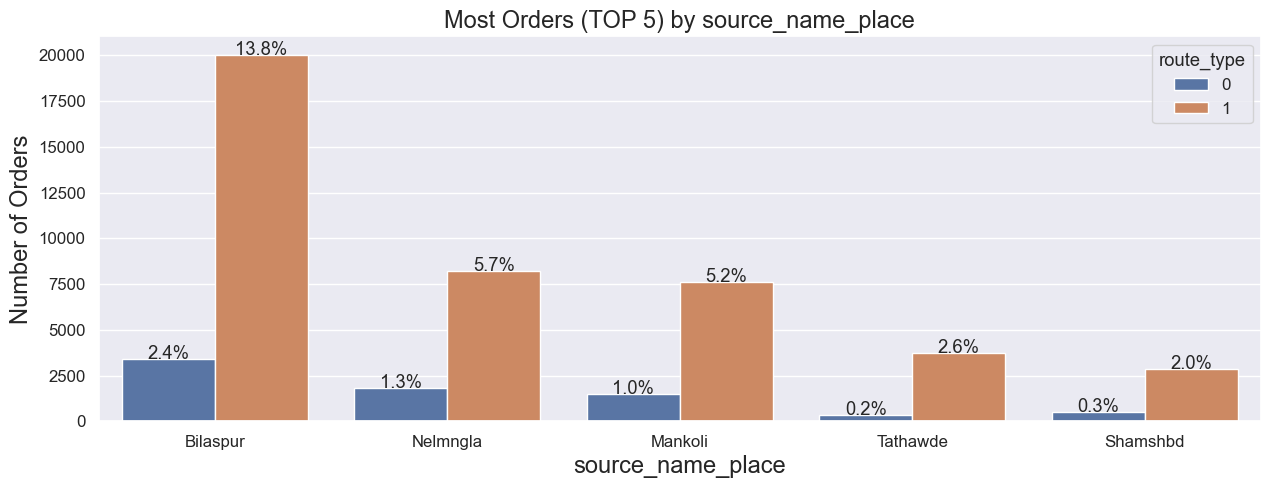

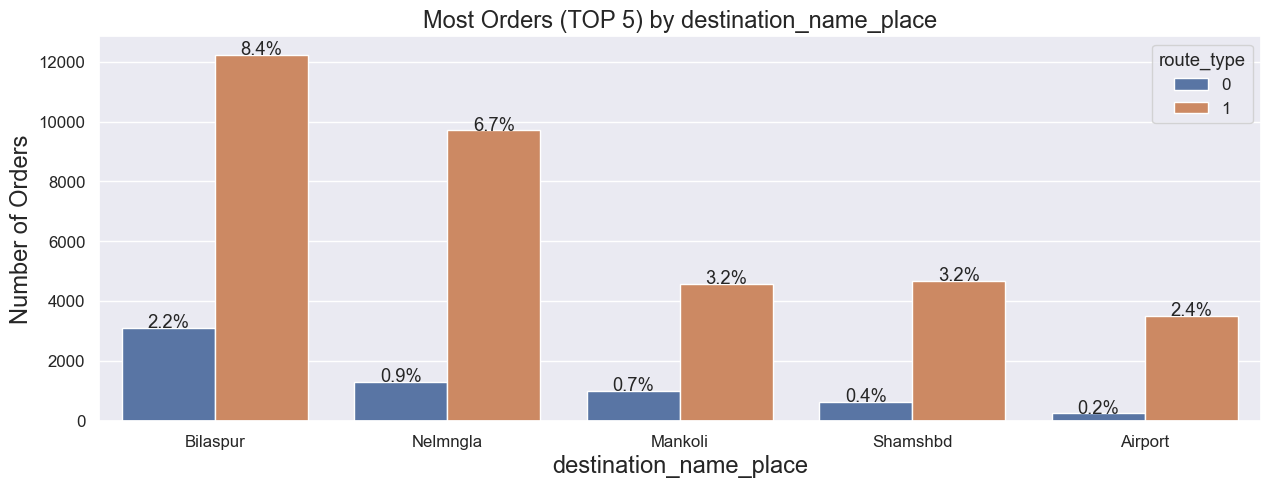

In [274]:
plot_orders_by_feature(['source_name_state','destination_name_state','source_name_city','destination_name_city','source_name_place','destination_name_place'])

- **Insights** on Busiest State/Corridor
 - **Busiest source states** are: 
   - **Haryana**(14.9% Full truck load , 3.7% Carting) 
   - **Maharashtra** (9.4% Full truck load , 3.7% Carting)
   - **Karnataka** (7.4% Full truck load , 5.3% Carting)
 - **Busiest Destination states** are: 
   - **Haryana**(9.9% Full truck load , 3.7% Carting) 
   - **Karnataka** (8.4% Full truck load , 5.2% Carting)
   - **Maharashtra** (7.1% Full truck load , 3.7% Carting)
 - **Busiest source city** are: 
   - **Gurgaon**(13.8% Full truck load , 2.5% Carting) 
   - **Bengaluru** (5.9% Full truck load , 3.9% Carting)
   - **Bhiwandi** (5.2% Full truck load , 1% Carting) 
 - **Busiest Destination city** are: 
   - **Gurgaon**(8.4% Full truck load , 2.2% Carting) 
   - **Bengaluru** (6.9% Full truck load , 3.6% Carting)
   - **Hyderabad** (3.3% Full truck load , 0.7% Carting)
 - **Busiest source Place** are: 
   - **Bilaspur**(13.8% Full truck load , 2.4% Carting) 
   - **Nelmngla** (5.7% Full truck load , 1.3% Carting)
   - **Mankoli** (5.2% Full truck load , 1% Carting) 
 - **Busiest Destination Place** are: 
   - **Bilaspur**(8.4% Full truck load , 2.2% Carting) 
   - **Nelmngla** (6.7% Full truck load , 0.9% Carting)
   - **Mankoli** (3.2% Full truck load , 0.7% Carting) 

### Busiest corridor | avg distance , avg time taken

In [275]:
stats.ttest_ind(df["start_scan_to_end_scan"],df["actual_time"])

Ttest_indResult(statistic=173.06512569398697, pvalue=0.0)

In [276]:
df_busiest_corridor = df[(df["destination_name_city"] == 'Gurgaon') | (df["destination_name_city"] == 'Bengaluru') | (df["destination_name_city"] == 'Hyderabad') | (df["destination_name_city"] == 'Bhiwandi')]
df_busiest_corridor = df_busiest_corridor[["actual_distance_to_destination","actual_time","source_name_city","source_name_place","destination_name_city","destination_name_place"]]   

####  Calculate "avg time" of destination busiest corridor - Gurgaon , Bangaluru , Hyderabad 

In [277]:
avg_time_taken = df_busiest_corridor.groupby(['destination_name_city'])['actual_time'].aggregate(['mean'])
avg_time_taken.reset_index().sort_values(['mean','destination_name_city'],ascending=False)

,destination_name_city,mean
2,Gurgaon,739.855776
0,Bengaluru,677.203274
1,Bhiwandi,667.344970
3,Hyderabad,512.264766


####  Calculate "avg distance" of destination busiest corridor - Gurgaon , Bangaluru , Hyderabad 

In [278]:
avg_distance_taken = df_busiest_corridor.groupby(['destination_name_city'])['actual_distance_to_destination'].aggregate(['mean'])
avg_distance_taken.reset_index().sort_values(['mean','destination_name_city'],ascending=False)

,destination_name_city,mean
2,Gurgaon,437.276411
0,Bengaluru,412.491168
1,Bhiwandi,367.409988
3,Hyderabad,295.929211


### Recommendations - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand.

- **Key considerations**:
  - Below recommendation will be more effective when more appropriate measures taken care wrt. outliers and more granular feature engineering are taken care as well
- **Actionable items for business**
    - **State/Place/City based marketing** would be **more effective**:
        - More **discounts on reverse routes** to **raise volume of orders**
        - **Long term Reserved booking discounts** between **top source and destinations**
    - **Days based promotions** **when** there are **less truck loads bookings**
    - **Volume based marketing** on **popular source and destinations** would be more effective 
    - **Delivery time estimation to be predicted accurately**
        - **More pre-booking order** can be taken up **based on estimated delivery time**
        - **More promotions on pre-booking and discounting offers**
        - **Orders on 5th, 6th and 7th day of the month** should **maximized based on delivery time estimates** as their minimal operations on those days 
    - **Route based promotions** can be more **effective**
        - **Full truck load promotions in states such as Haryana, Maharashtra, Karnataka, Delhi, Telangana**
        - **Carting promotions in states such as "Uttarakhand”, "Rajasthan", "Jharkhand"**